# Split Operator Method

The Schrodinger equation can be written as

\begin{equation}
i \hbar \frac{\partial \psi}{\partial t} = \hat{H} \psi 
\end{equation}

The solution to this equation is given by

\begin{equation}
\psi (t) = e^{- i \frac{\hat{H}}{\hbar}t} \psi (0) 
\end{equation}

where 

\begin{equation}
\hat{H} = \frac{p^2}{2m} + V(x)
\end{equation}

Since $p^2$ and $V$ do not commute, we cannot write the exponential as

\begin{equation}
e^{- i \frac{\hat{H}}{\hbar}t} = e^{-it\frac{p^2}{2m\hbar}}e^{-it\frac{V(x)}{\hbar}}
\end{equation}

without introducing and error.
In the following simulation, we used the Lie-Suzuki-Trotter approach and divided the time t in small intervals $\Delta t$, so that the error introduced by splitting the exponential terms scales as $e^{\Delta t^2}$ and can be neglected.
Taking the states |x> and |p> as basis, we compute the time evalution of the wave function as

\begin{equation}
\psi(x,t = h) = \mathcal{F}^{-1} \left[e^{-i \Delta t \frac{p^2}{2m\hbar}} \mathcal{F} \left(e^{-i\Delta t\frac{V(x)}{\hbar}} \psi (x, t = 0)\right)\right]
\end{equation}

In [32]:
import numpy as np
import holoviews as hv
import math
import scipy.sparse.linalg as linalg
#%matplotlib inline
import matplotlib.pyplot as plt

hv.notebook_extension()

In [33]:
dx = 1
L = 4000
x = np.arange(0, L, 1)
dt = 0.6
steps = 1000

In [43]:
def barrier(x):
    if x>1500 and x<2000:
        return 50
    else:
        return 0

def step(x):
    if x > 2000:
        return 50
    else:
        return 0

In [35]:
def split_operator(psi_init, V, x, dx, dt, L, steps):       
    dk = 2*math.pi/L
    k0 = -0.5*L*dk
    k = k0 + dk*x

    psi_r = np.zeros(shape = (int(L), int(steps)), dtype='complex')
    psi_r[:, 0] = psi_init    
    psi_k = np.zeros(shape = (int(L), int(steps)), dtype='complex')
    
    for i in range (0, steps-1):
        psi_k[:, i] = np.fft.fft(psi_r[:, i]*np.exp(-dt*V*1j))
        psi_r[:, i+1] = np.fft.ifft(psi_k[:, i] *np.exp(-dt*1j*k**2/2))
        
    return psi_r

In [36]:
psi_init= np.exp(-0.5*(x-800)**2/100**2 - 1j*0.05*x)

#   Normalize wave function
psi_init = psi_init/np.linalg.norm(psi_init)

b':HoloMap   [Time]\n   :Overlay\n      .Curve.I  :Curve   [x]   (y)\n      .Curve.II :Curve   [x]   (y)'
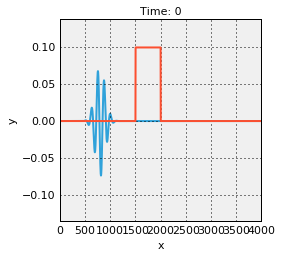
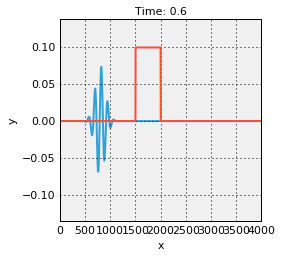
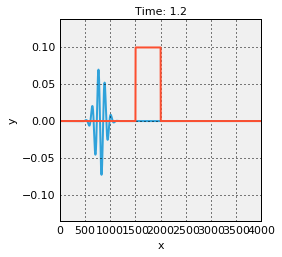
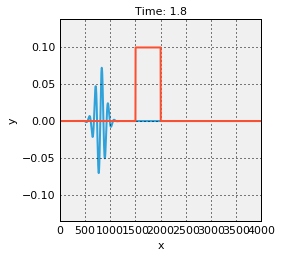
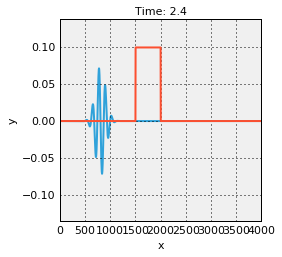
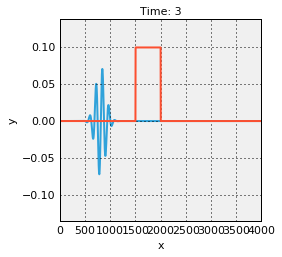
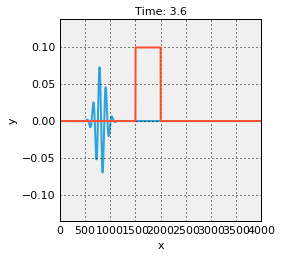
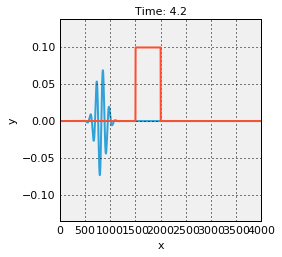
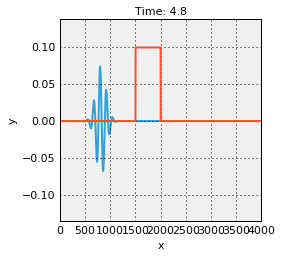
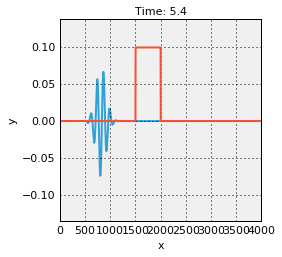
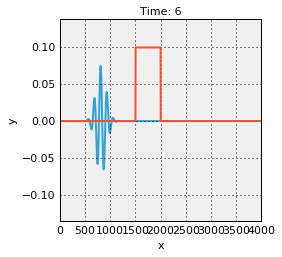
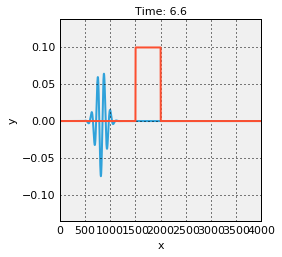
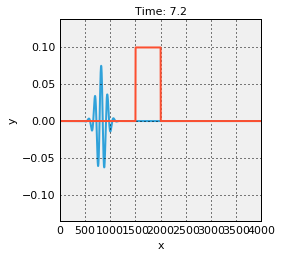
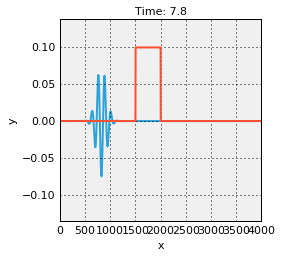
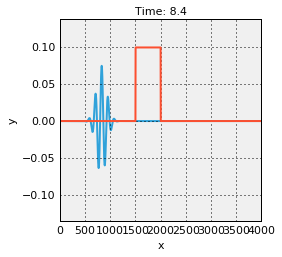
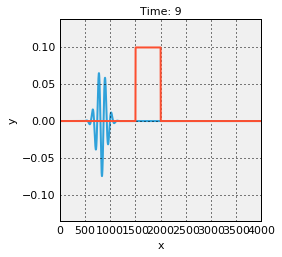
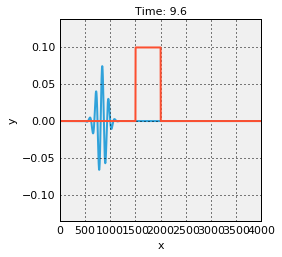
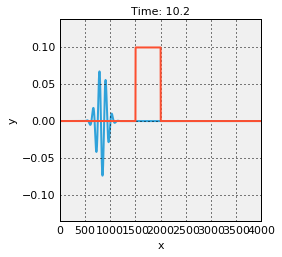
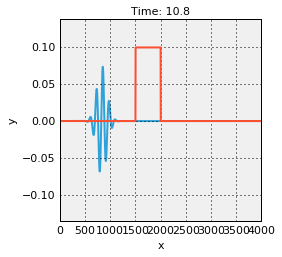
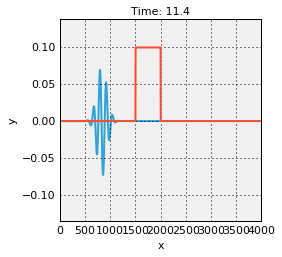
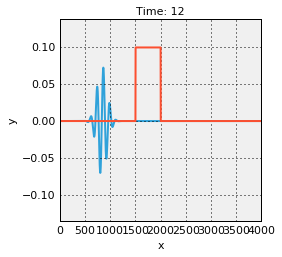
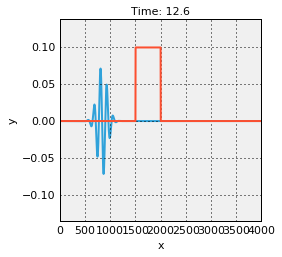
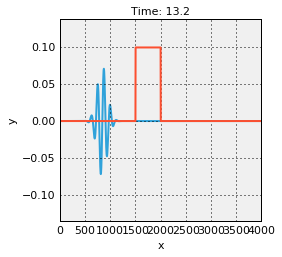
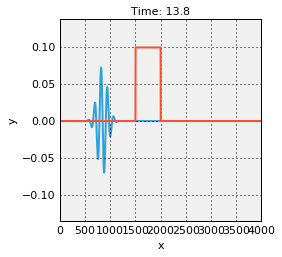
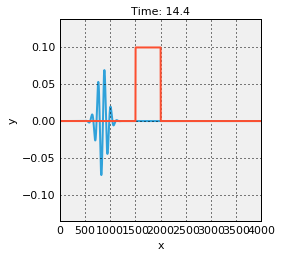
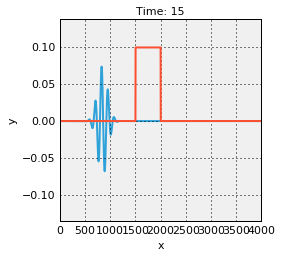
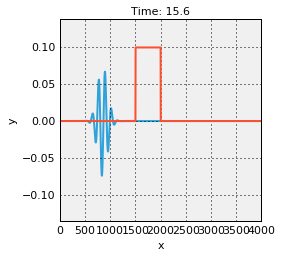
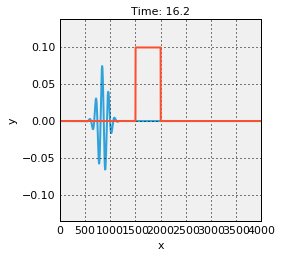
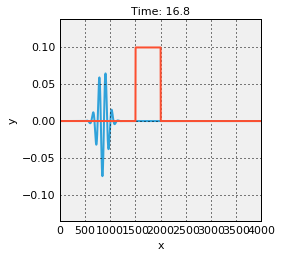
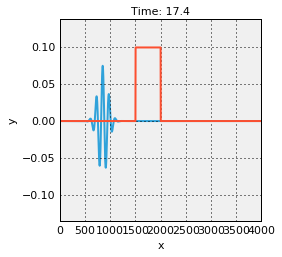
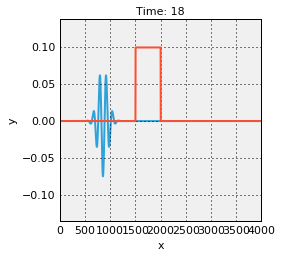
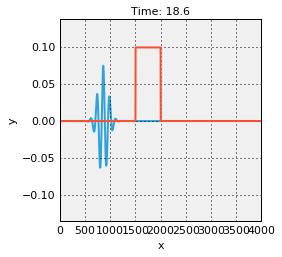
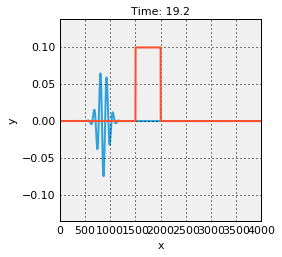
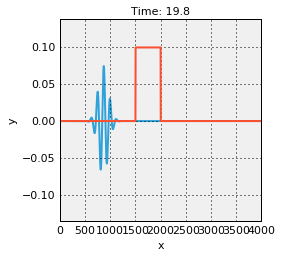
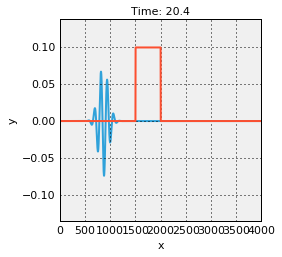
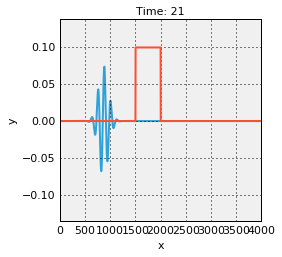
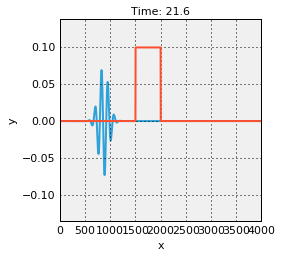
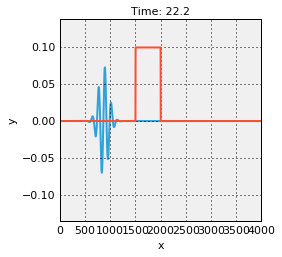
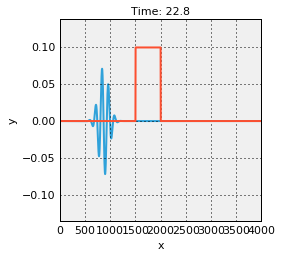
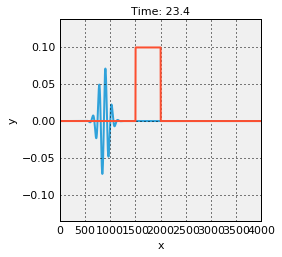
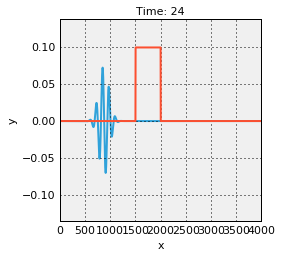
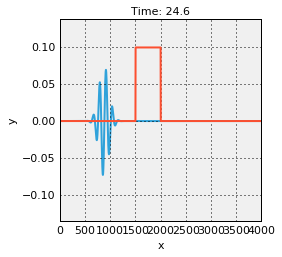
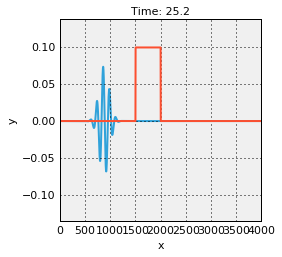
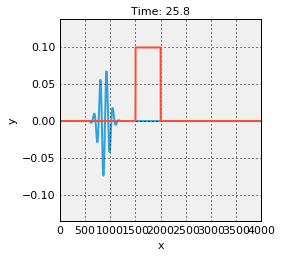
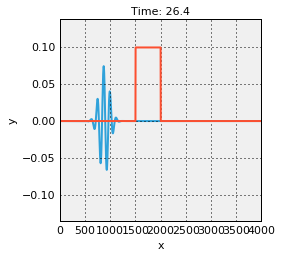
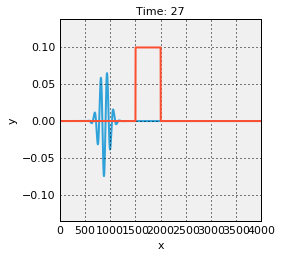
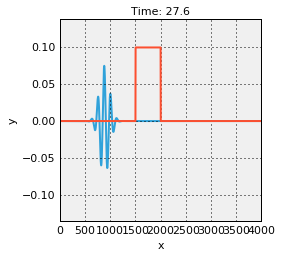
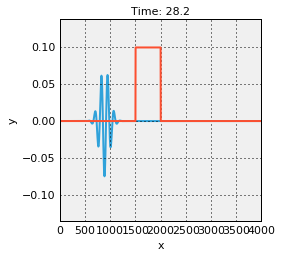
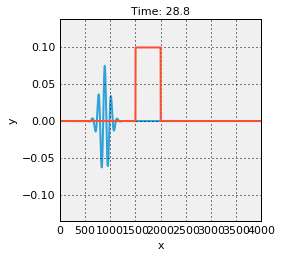
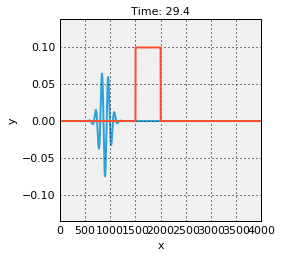
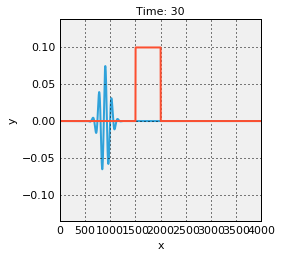
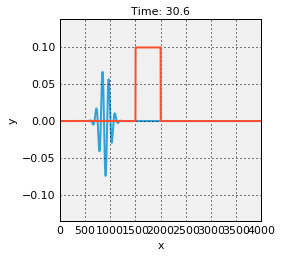
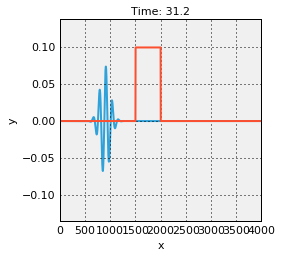
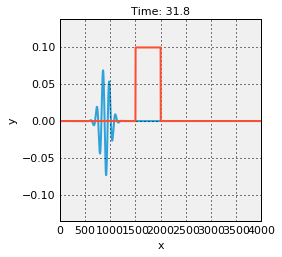
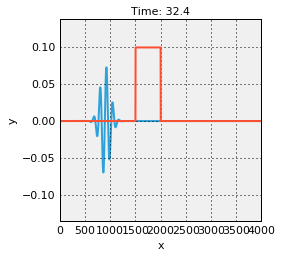
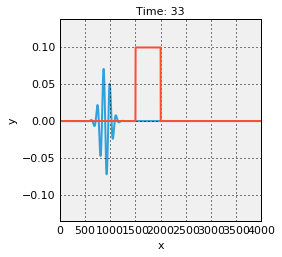
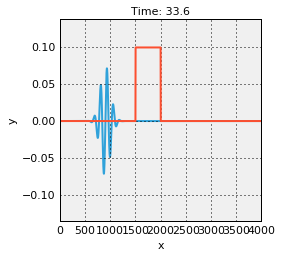
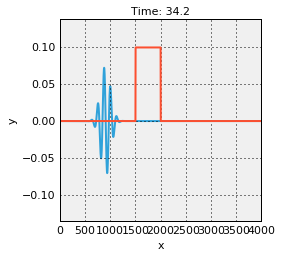
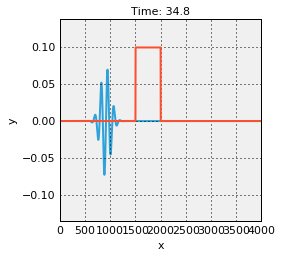
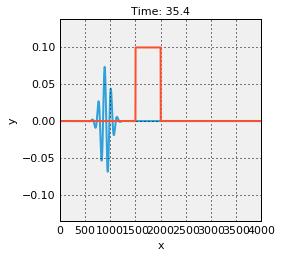
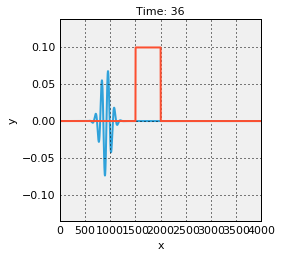
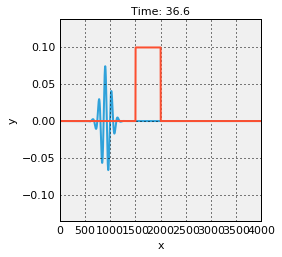
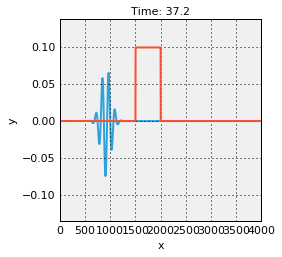
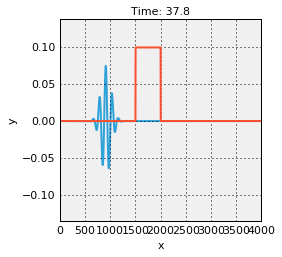
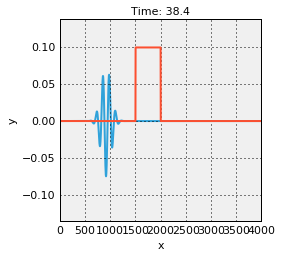
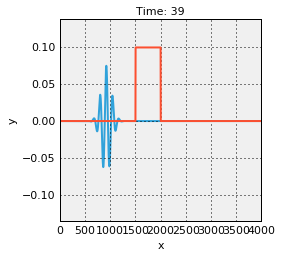
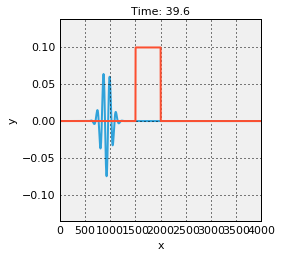
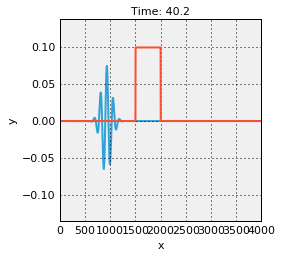
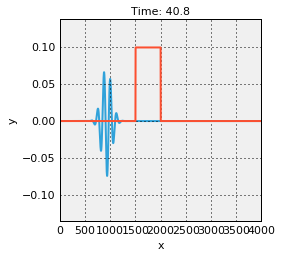
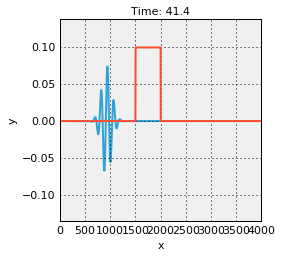
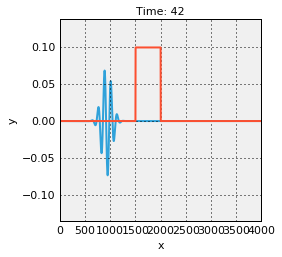
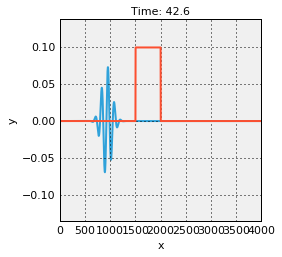
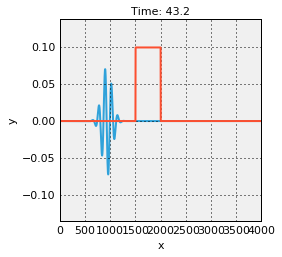
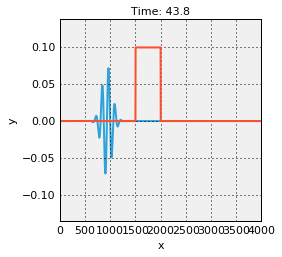
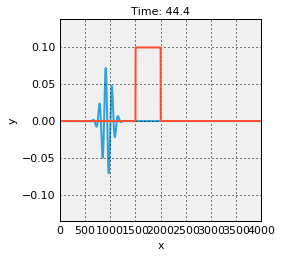
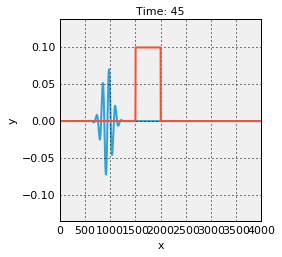
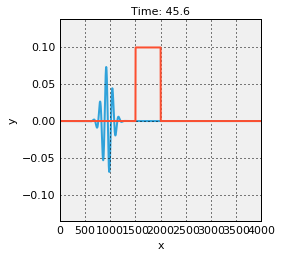
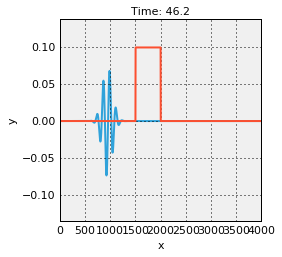
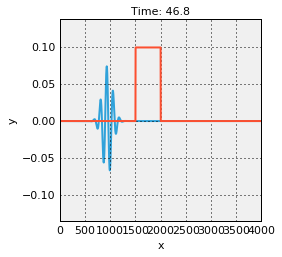
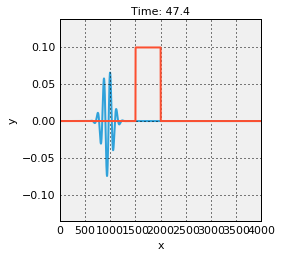
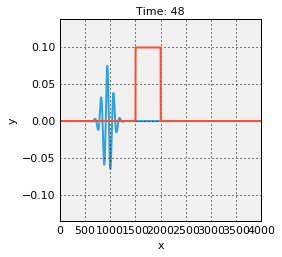
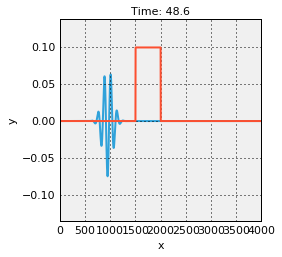
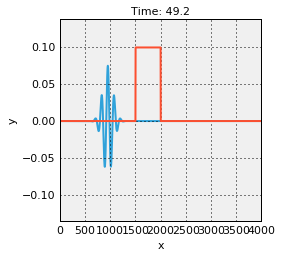
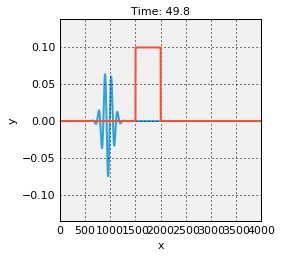
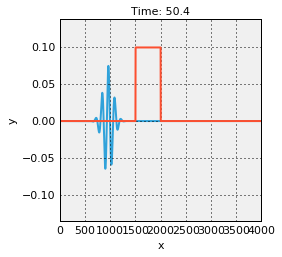
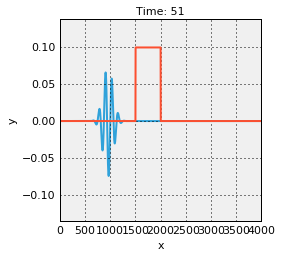
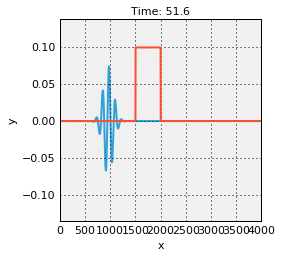
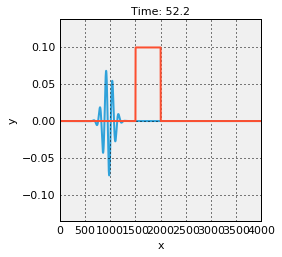
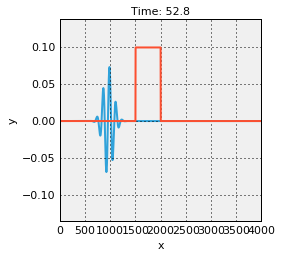
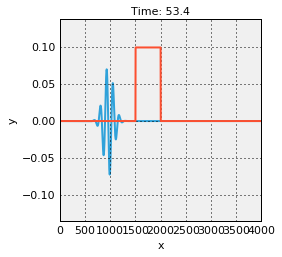
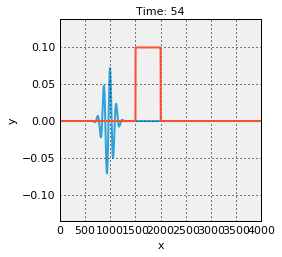
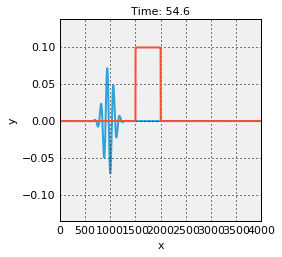
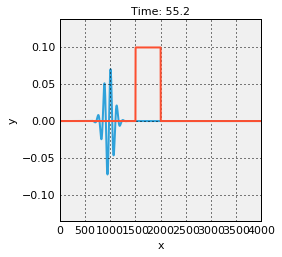
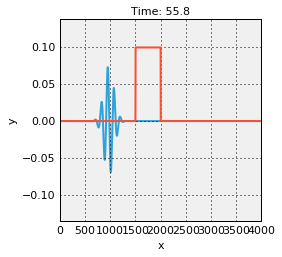
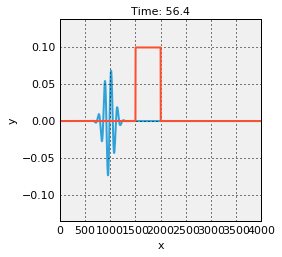
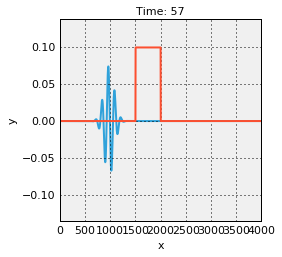
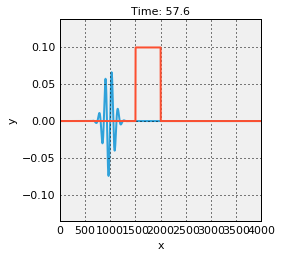
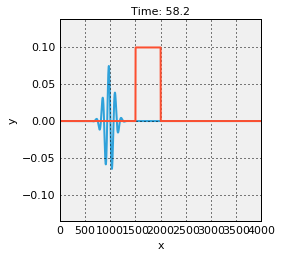
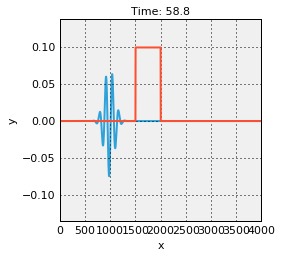
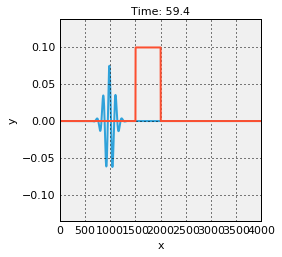
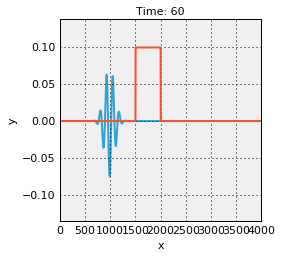
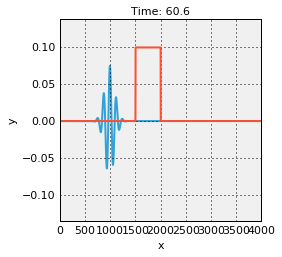
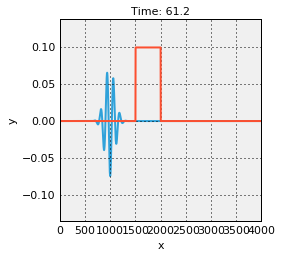
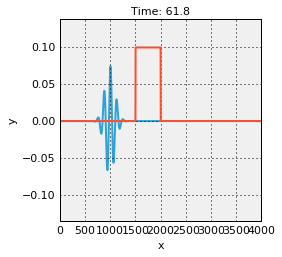
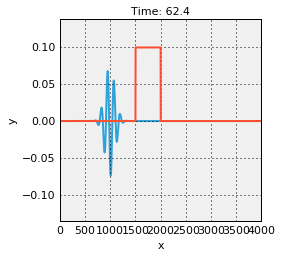
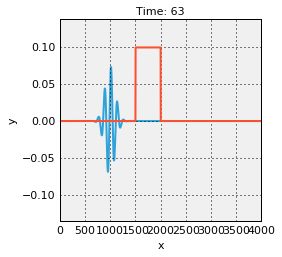
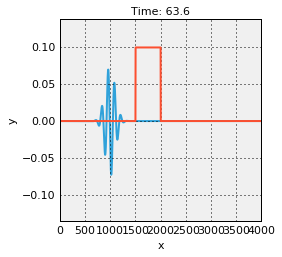
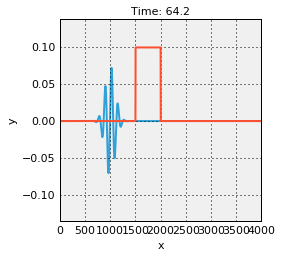
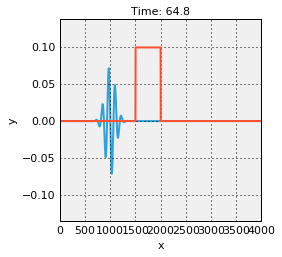
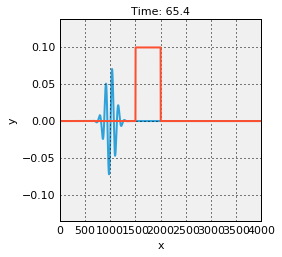
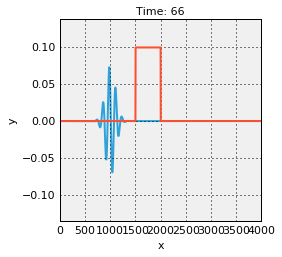
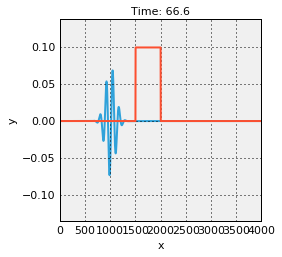
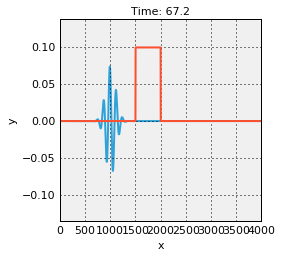
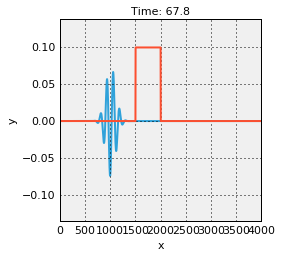
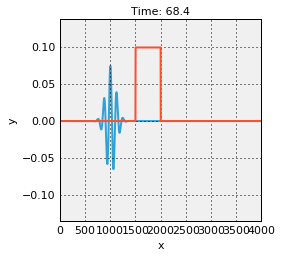
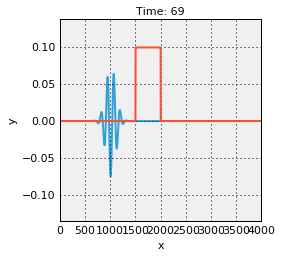
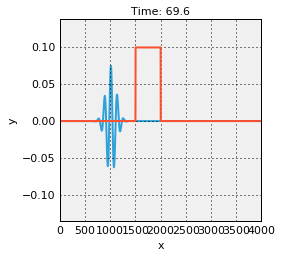
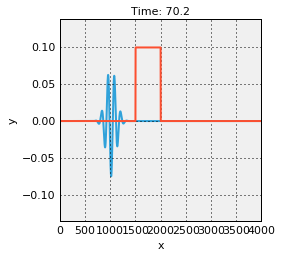
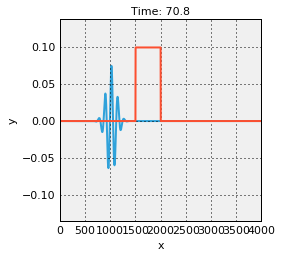
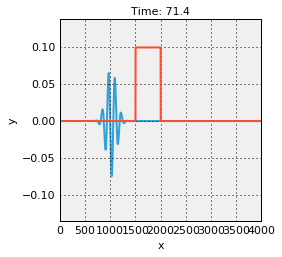
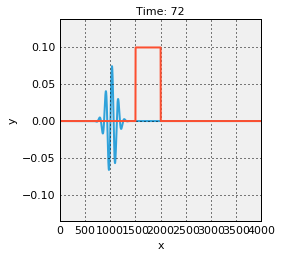
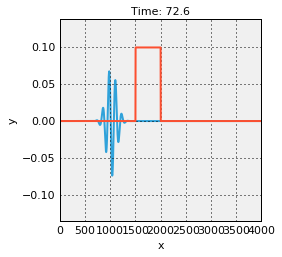
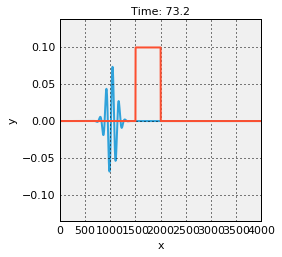
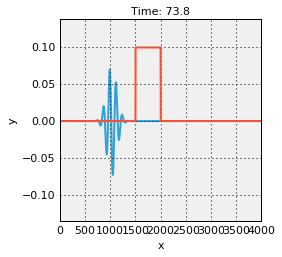
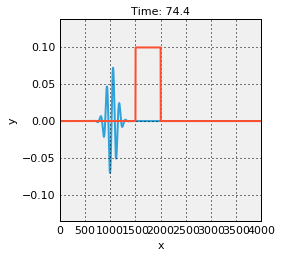
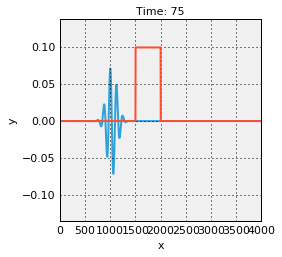
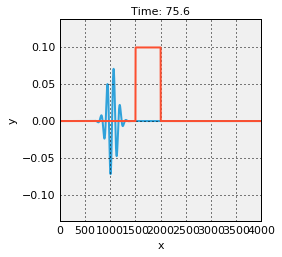
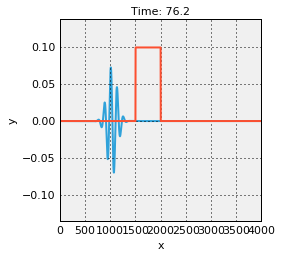
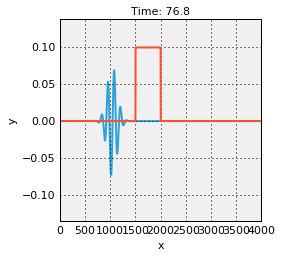
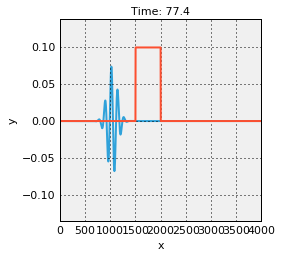
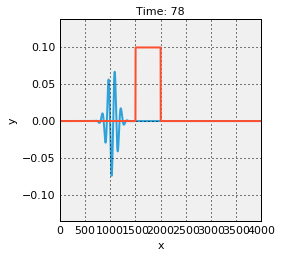
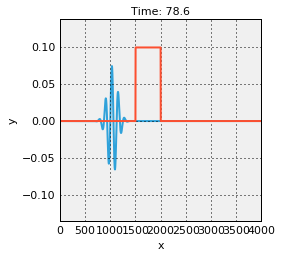
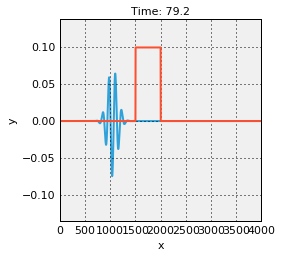
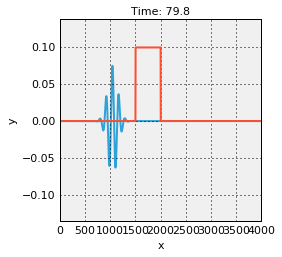
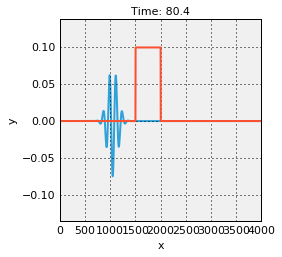
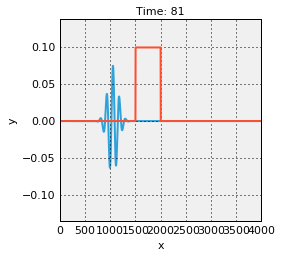
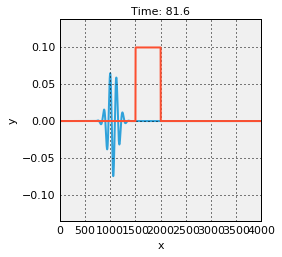
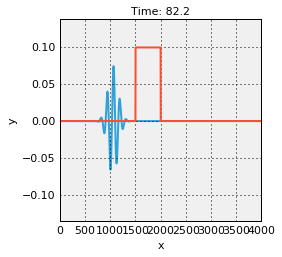
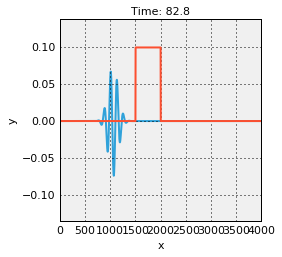
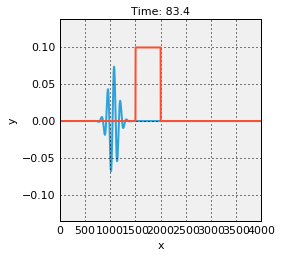
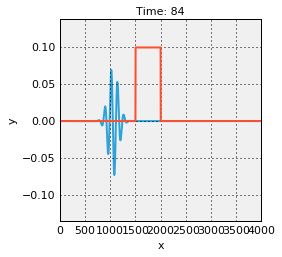
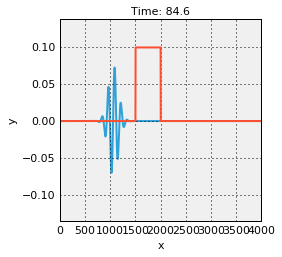
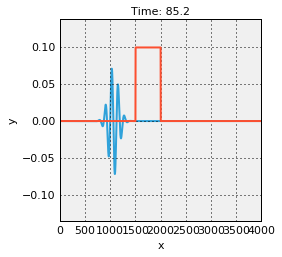
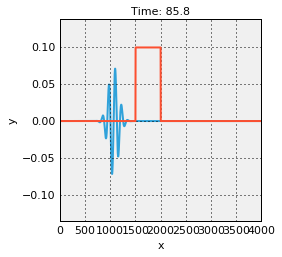
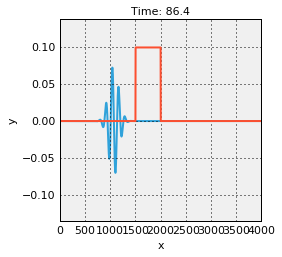
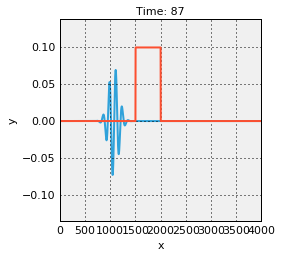
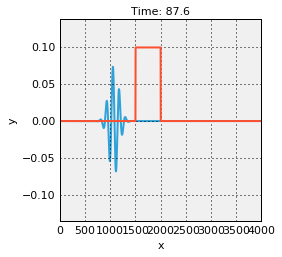
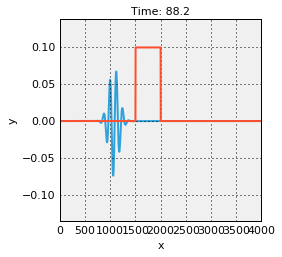
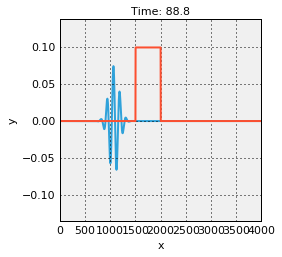
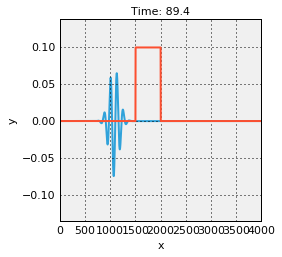
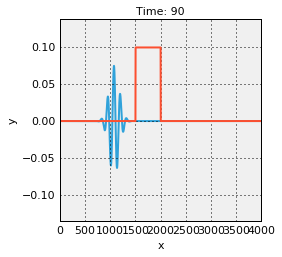
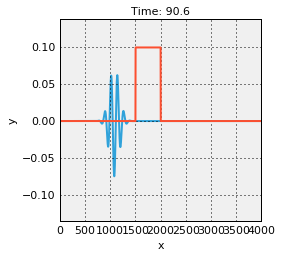
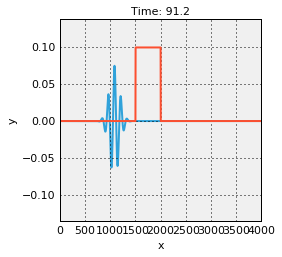
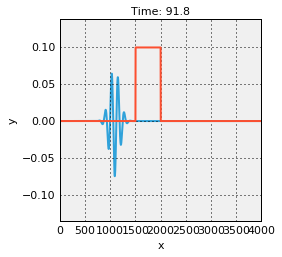
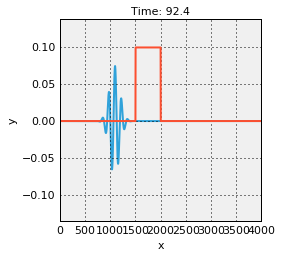
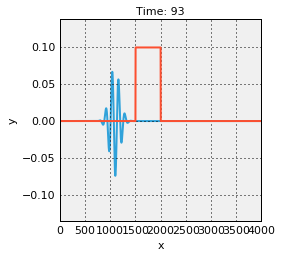
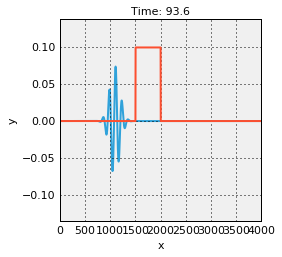
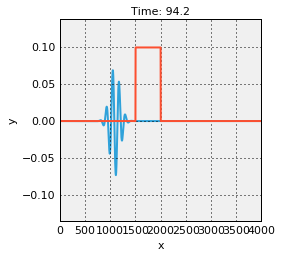
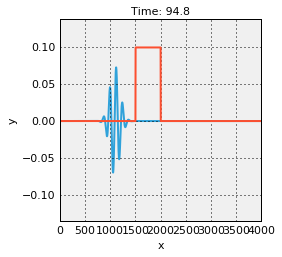
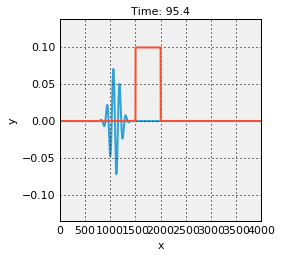
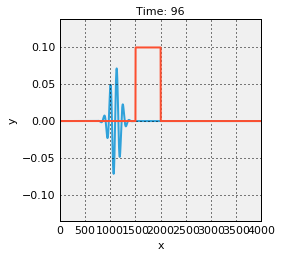
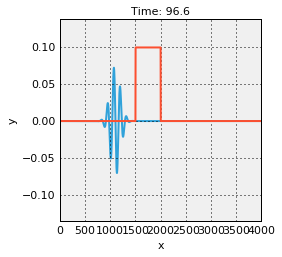
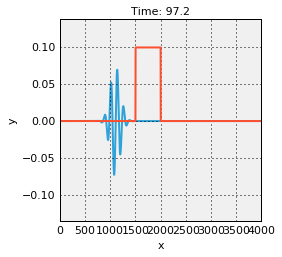
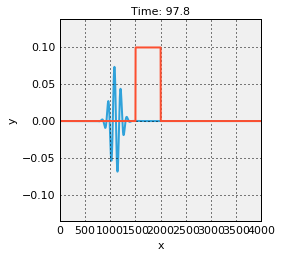
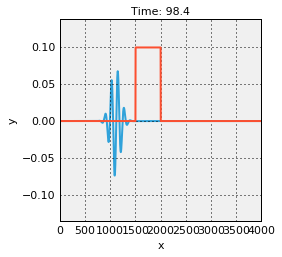
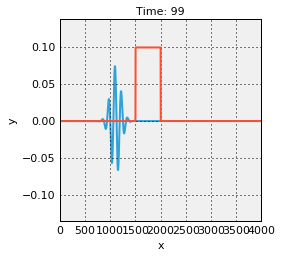
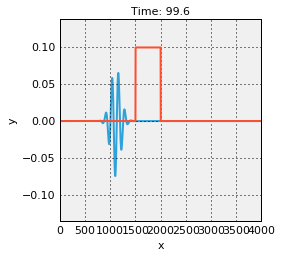
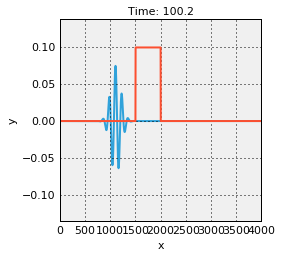
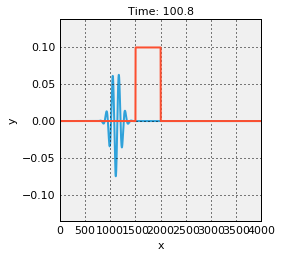
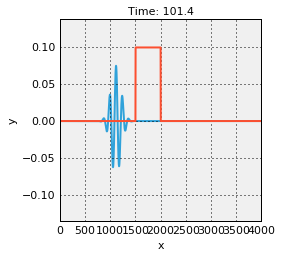
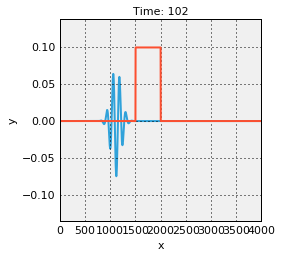
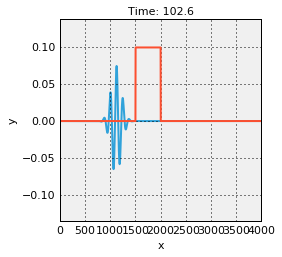
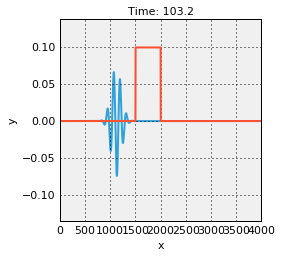
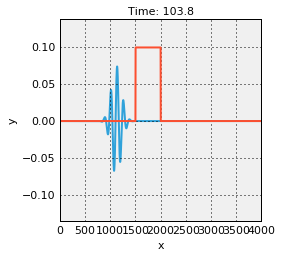
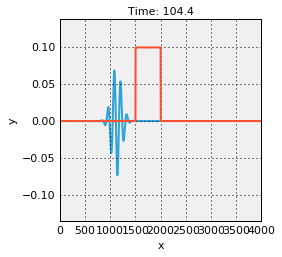
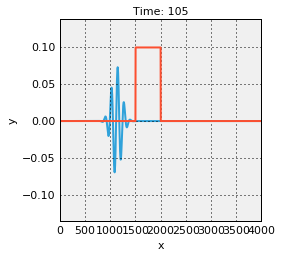
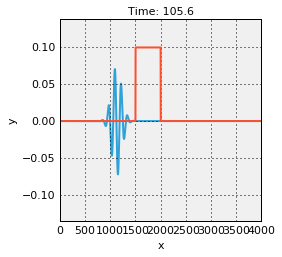
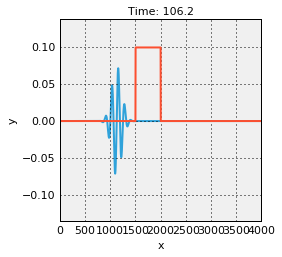
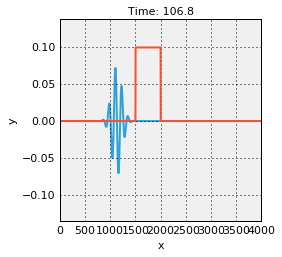
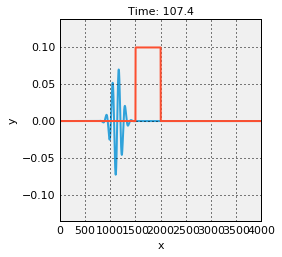
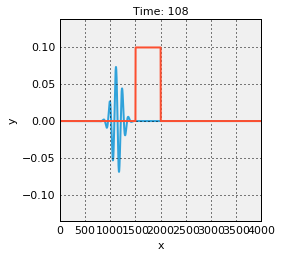
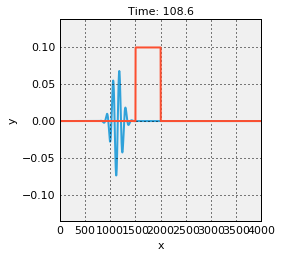
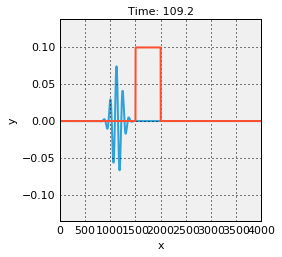
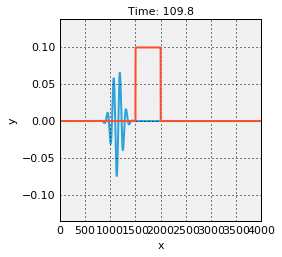
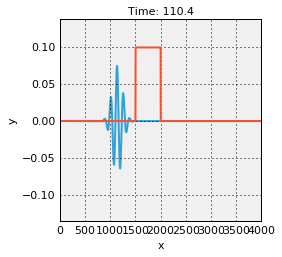
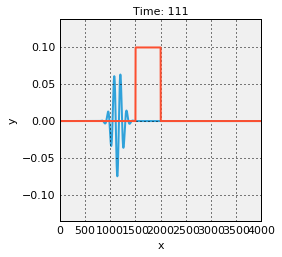
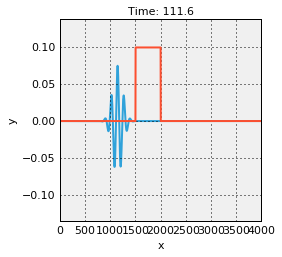
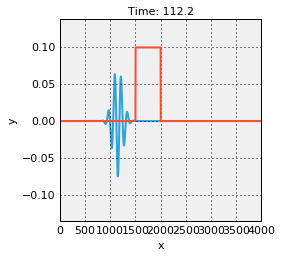
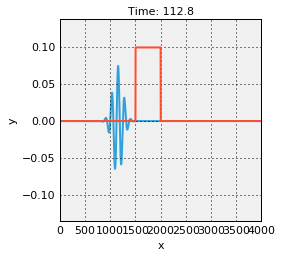
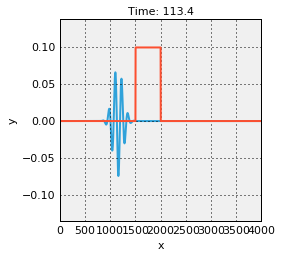
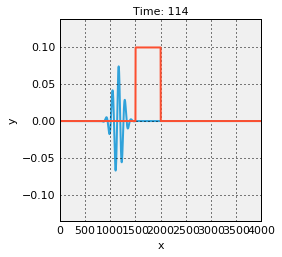
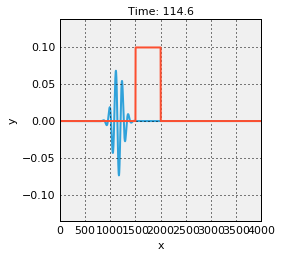
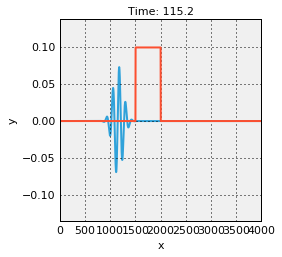
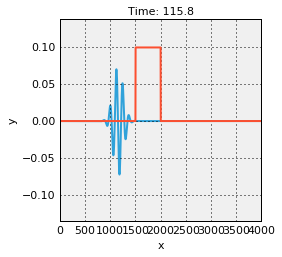
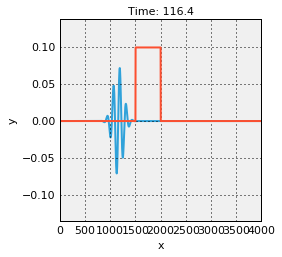
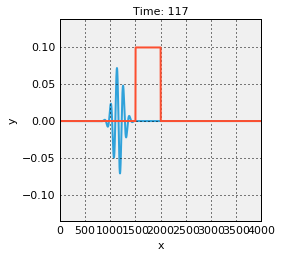
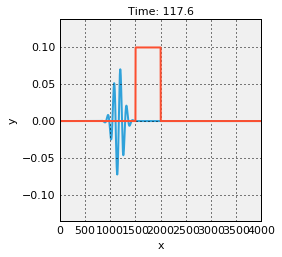
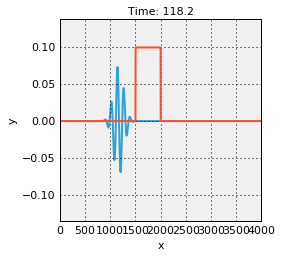
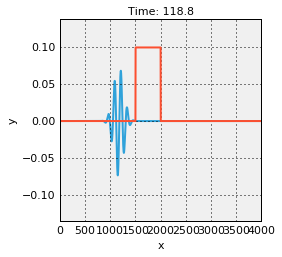
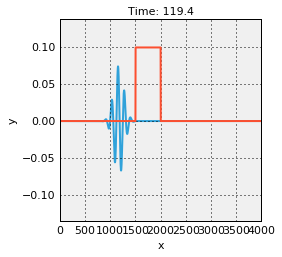
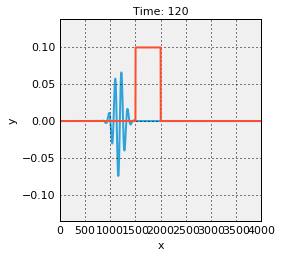
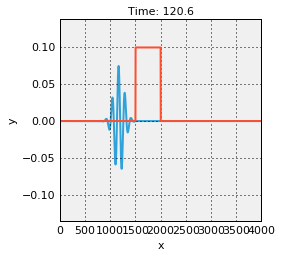
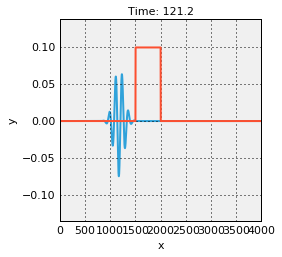
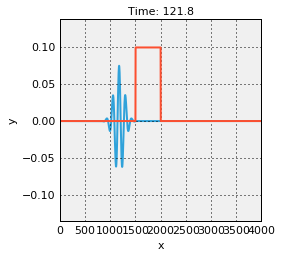
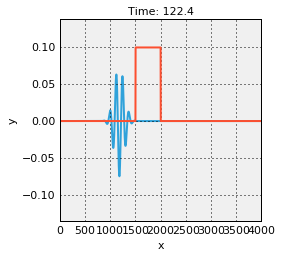
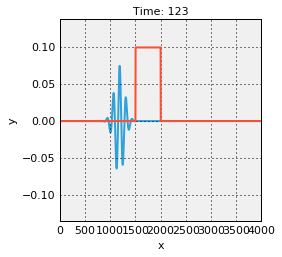
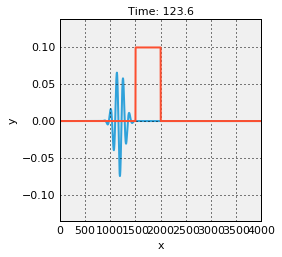
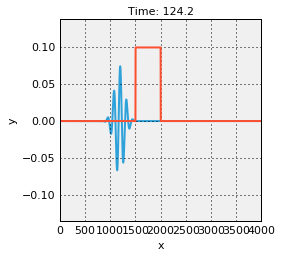
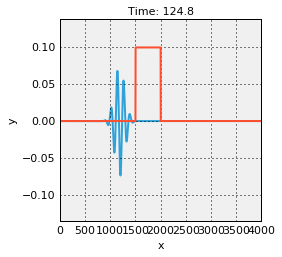
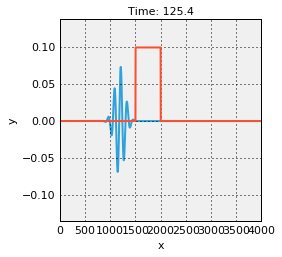
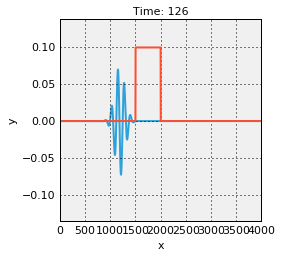
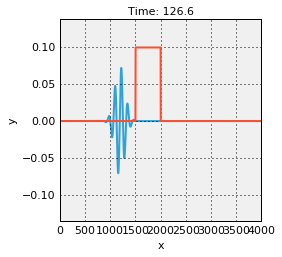
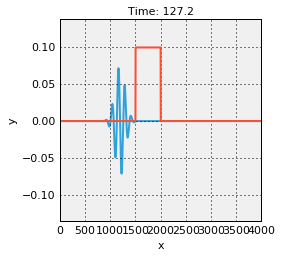
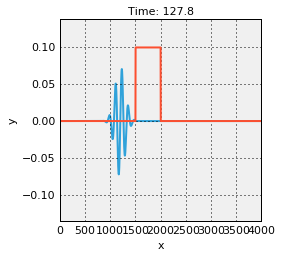
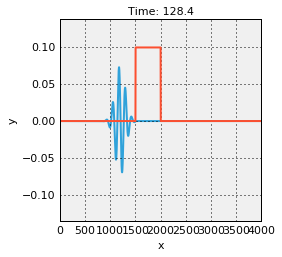
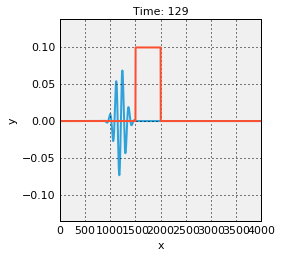
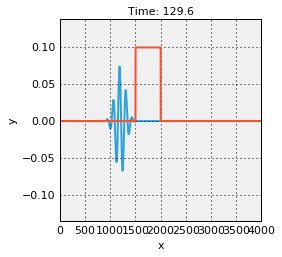
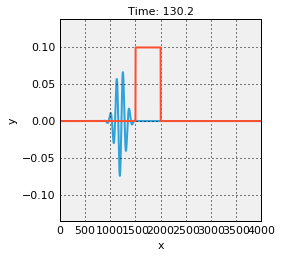
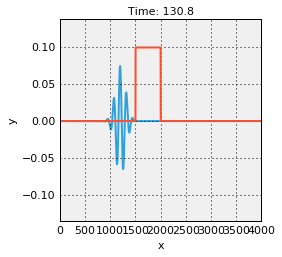
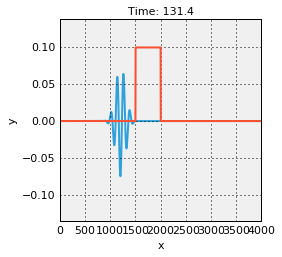
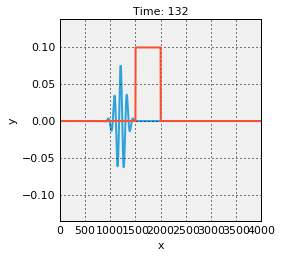
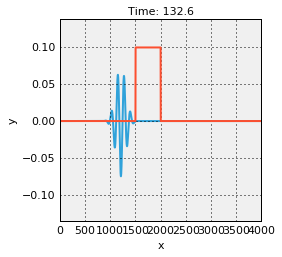
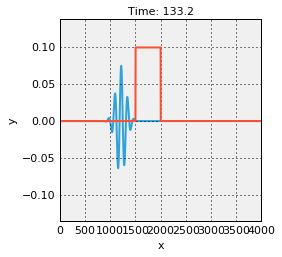
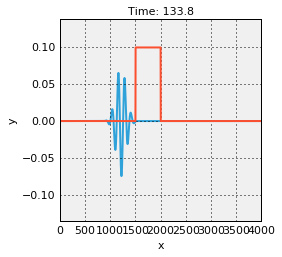
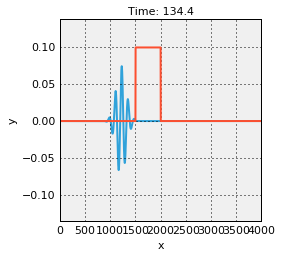
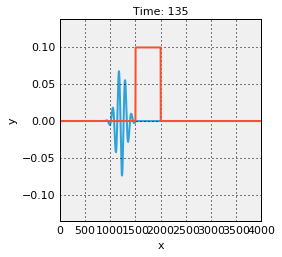
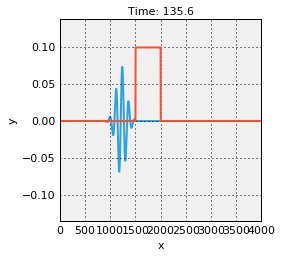
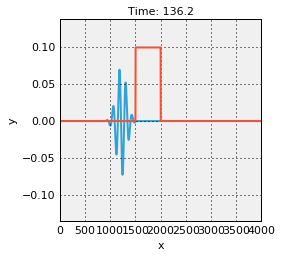
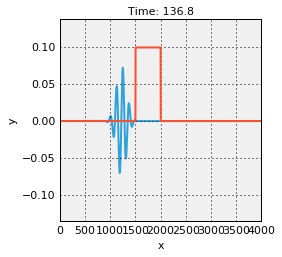
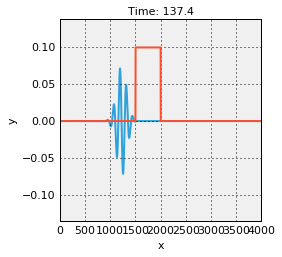
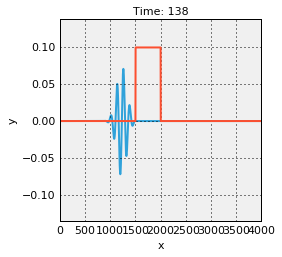
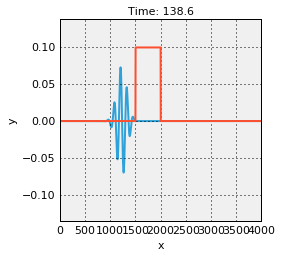
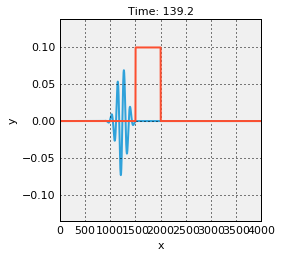
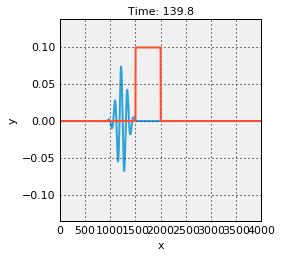
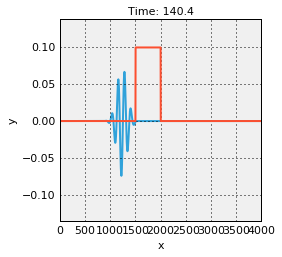
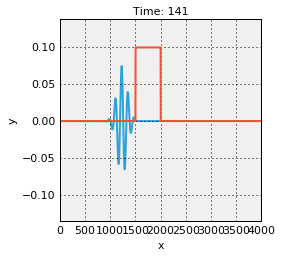
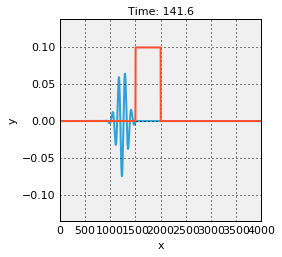
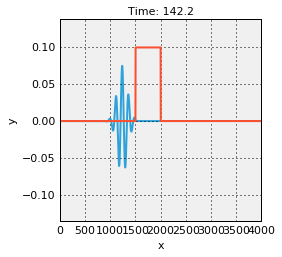
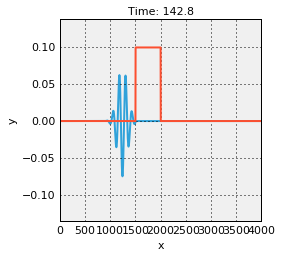
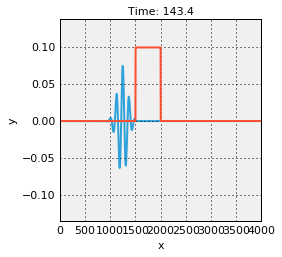
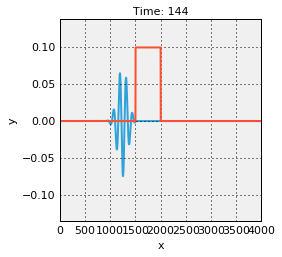
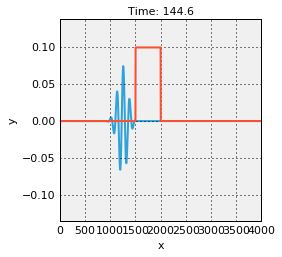
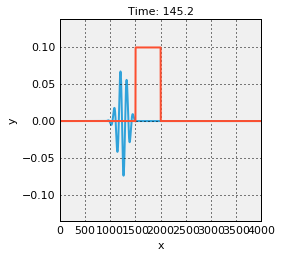
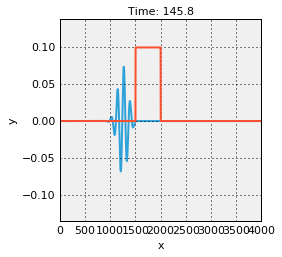
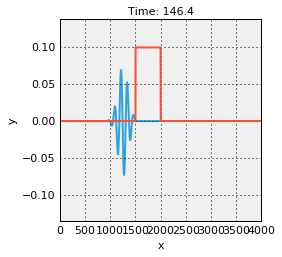
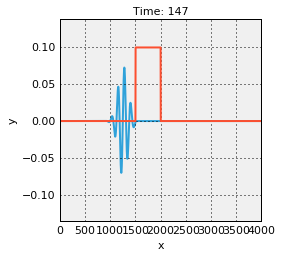
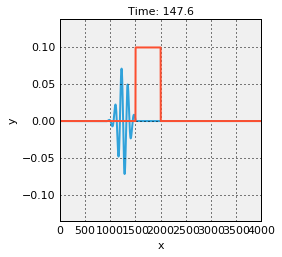
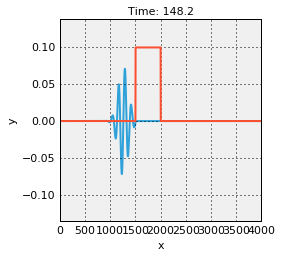
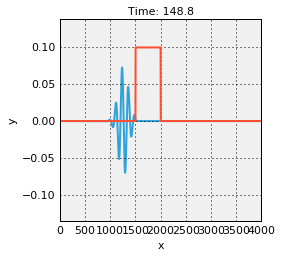
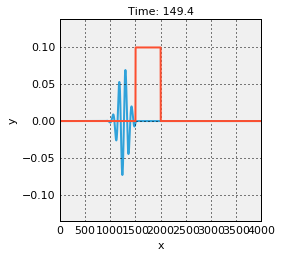
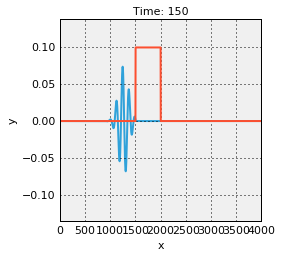
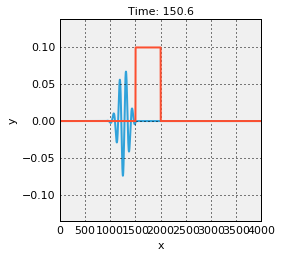
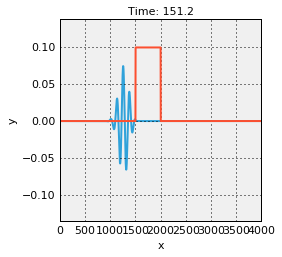
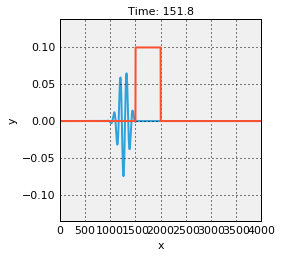
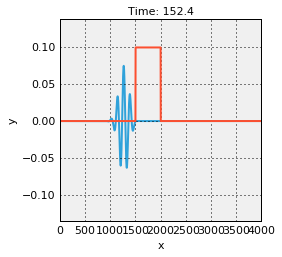
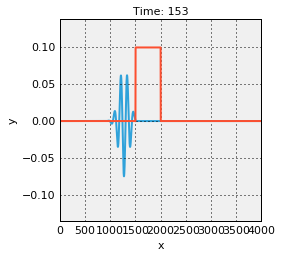
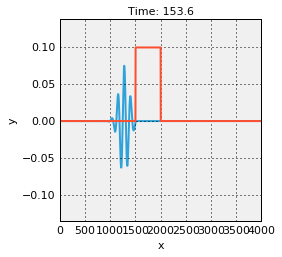
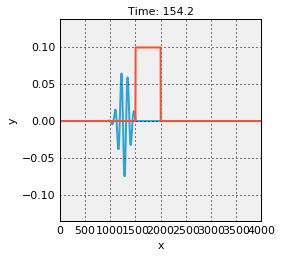
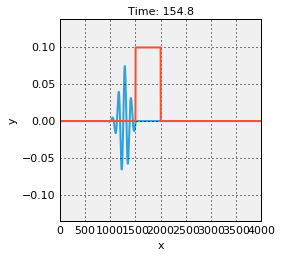
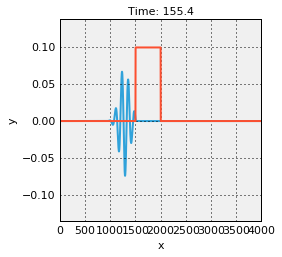
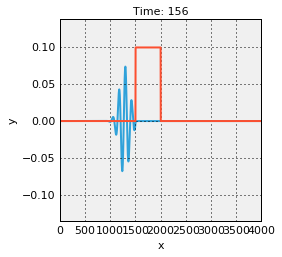
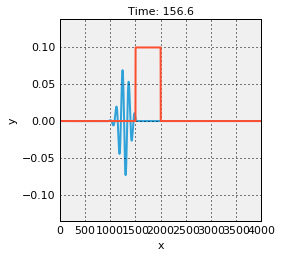
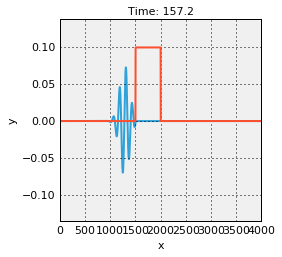
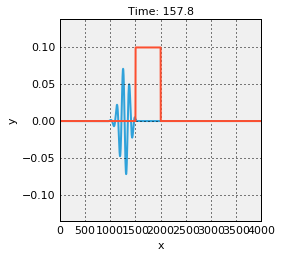
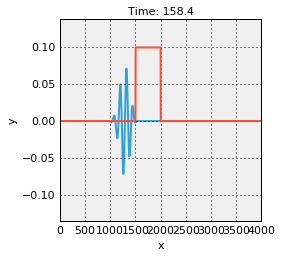
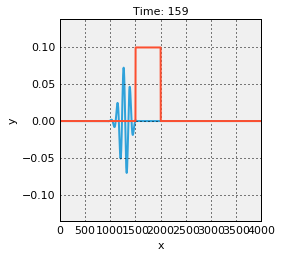
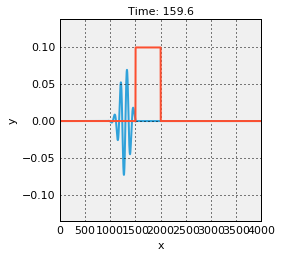
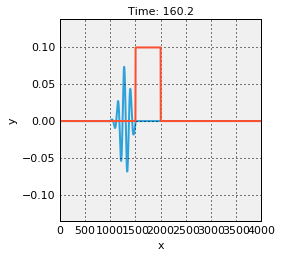
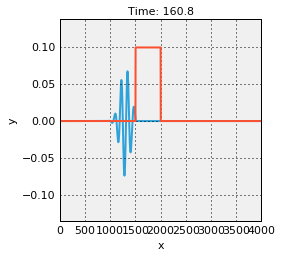
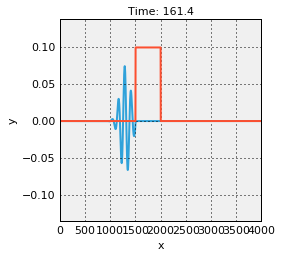
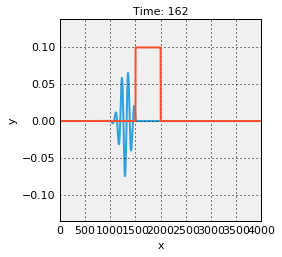
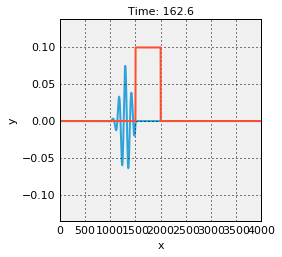
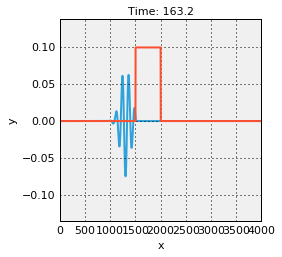
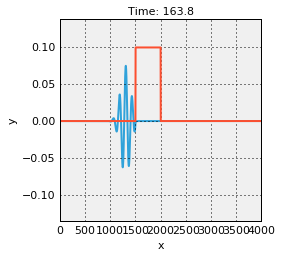
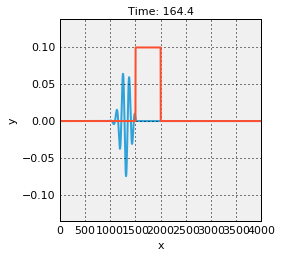
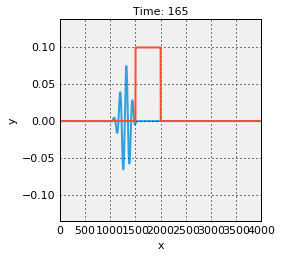
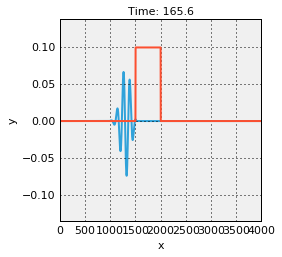
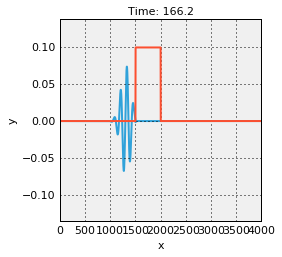
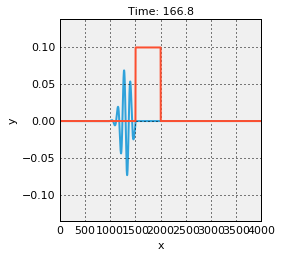
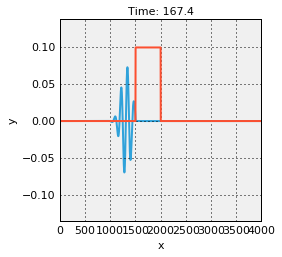
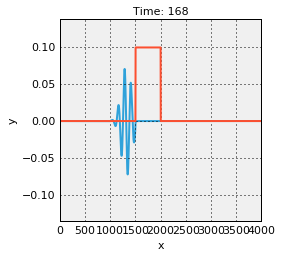
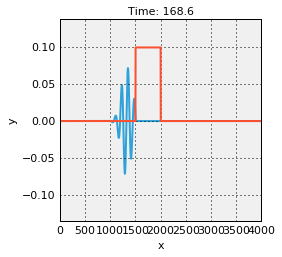
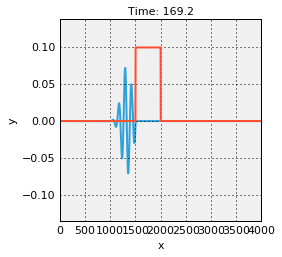
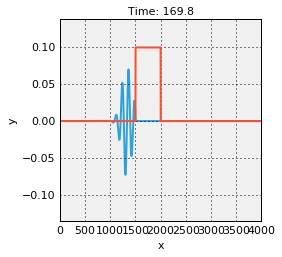
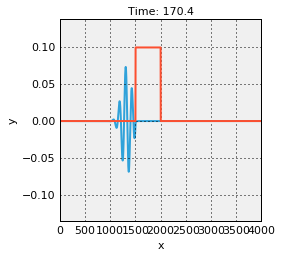
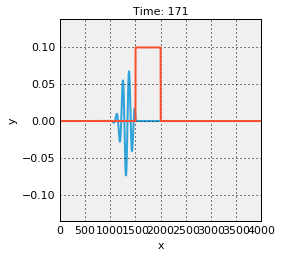
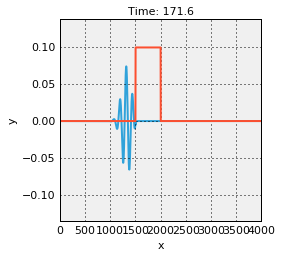
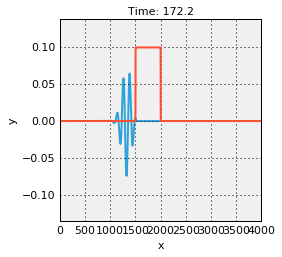
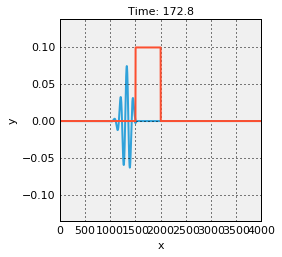
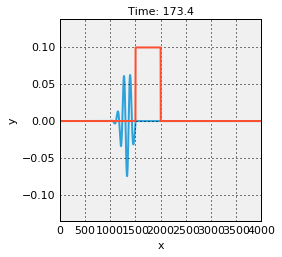
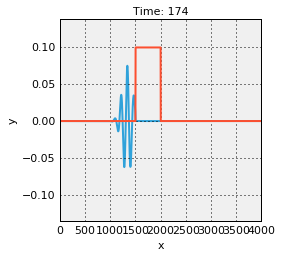
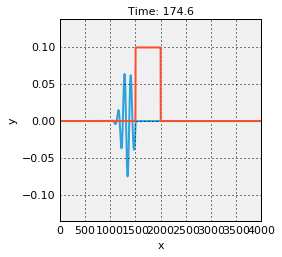
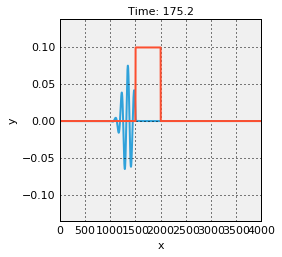
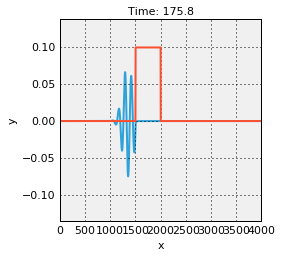
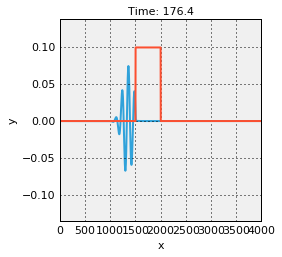
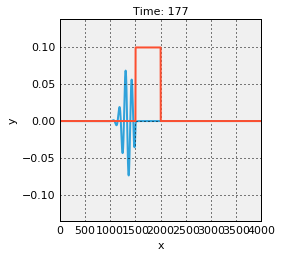
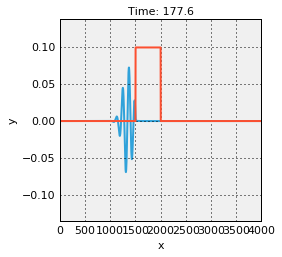
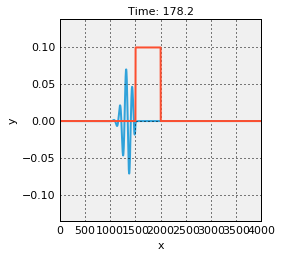
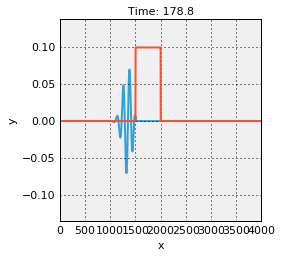
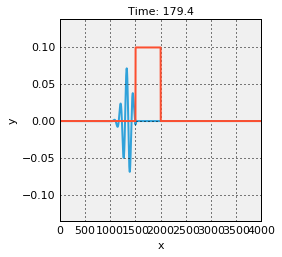
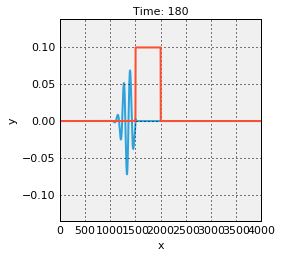
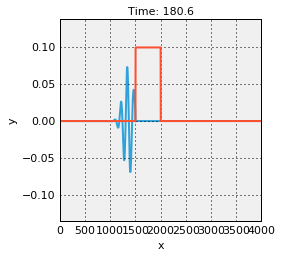
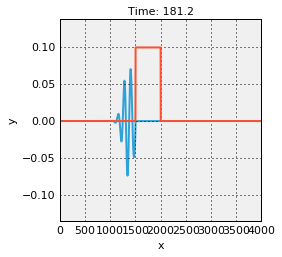
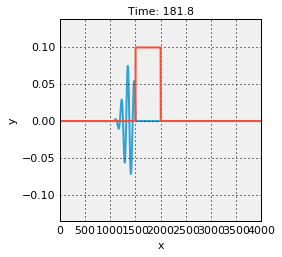
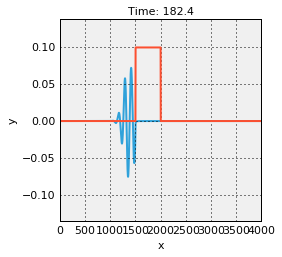
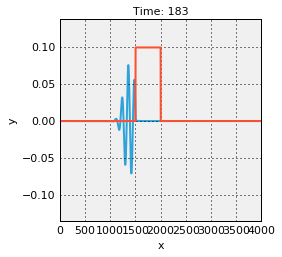
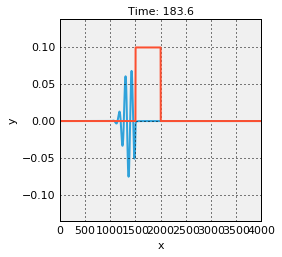
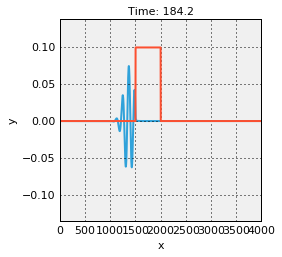
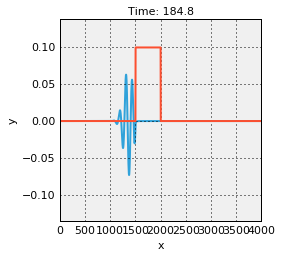
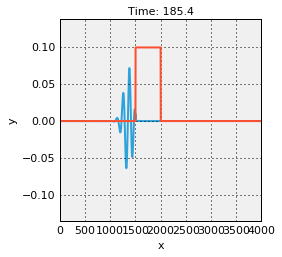
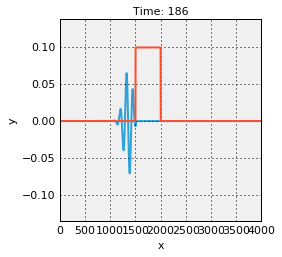
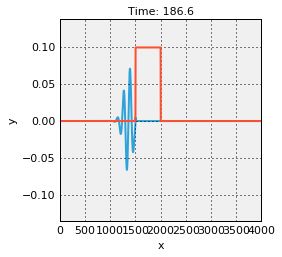
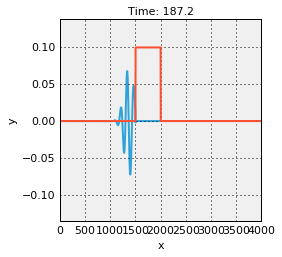
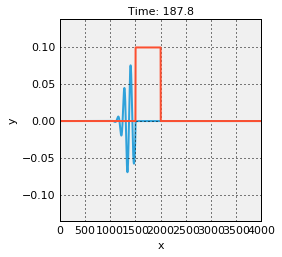
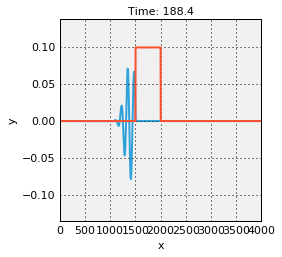
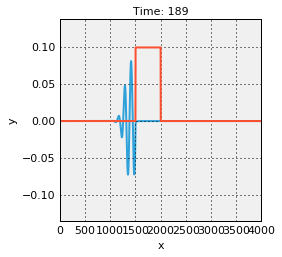
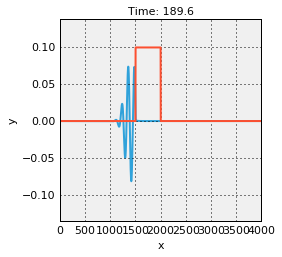
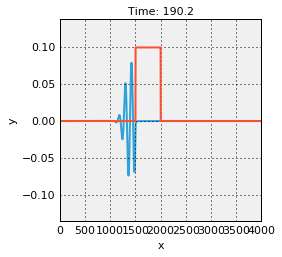
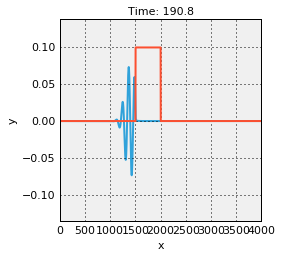
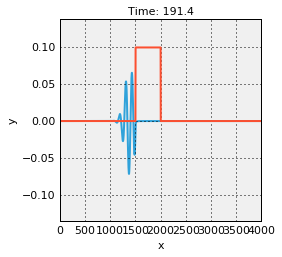
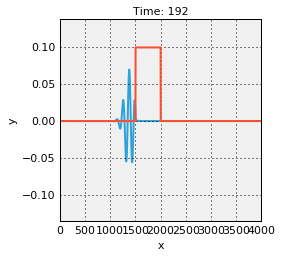
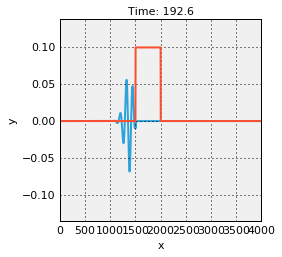
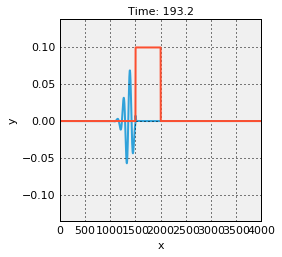
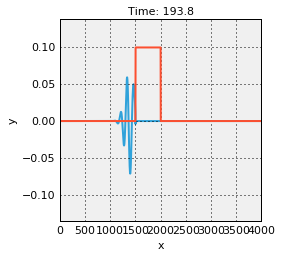
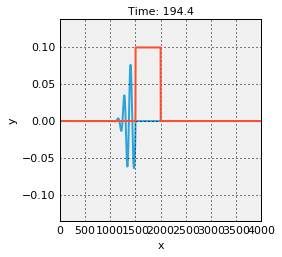
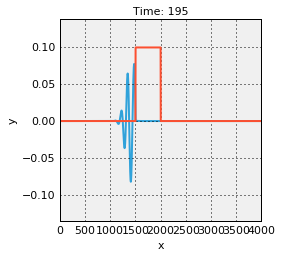
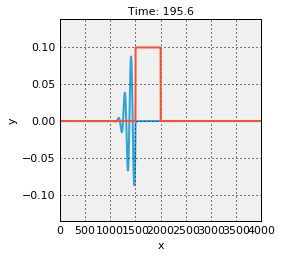
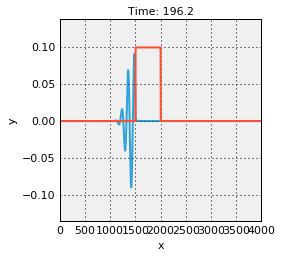
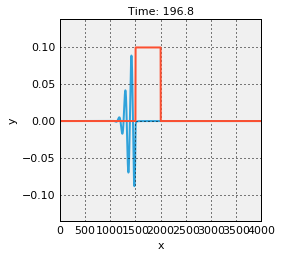
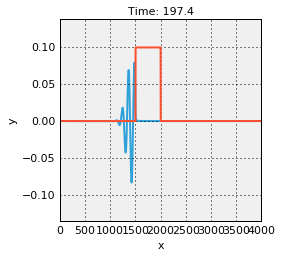
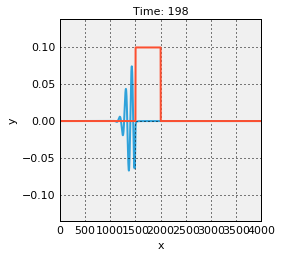
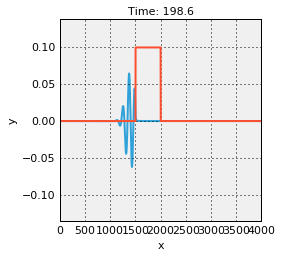
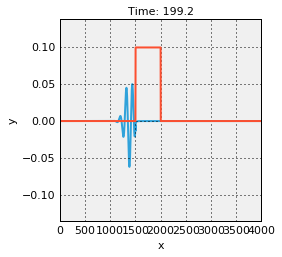
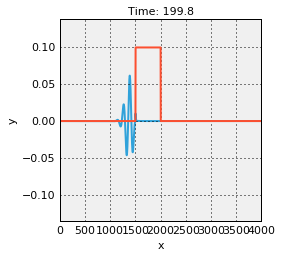
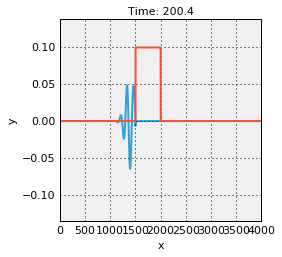
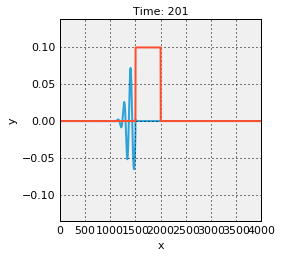
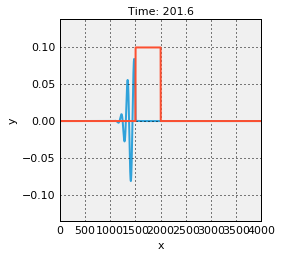
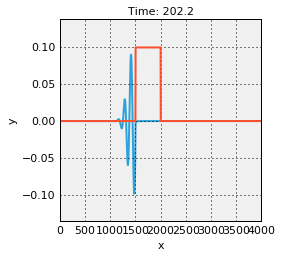
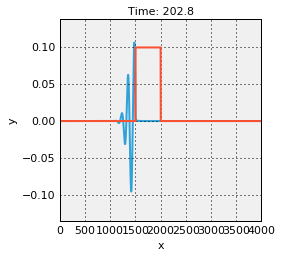
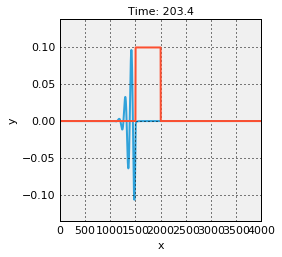
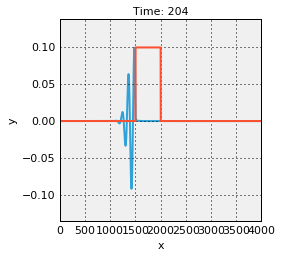
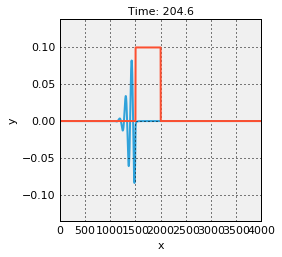
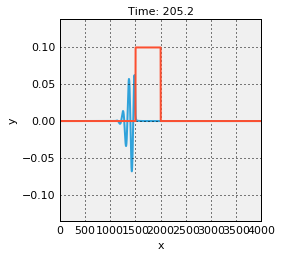
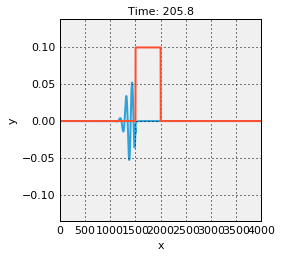
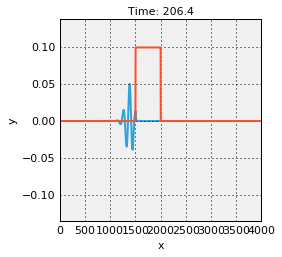
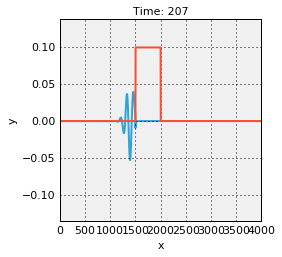
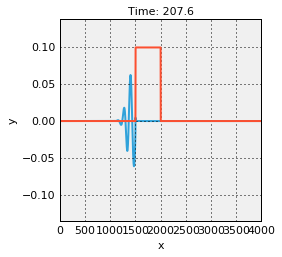
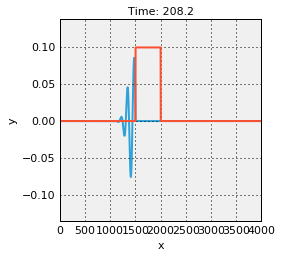
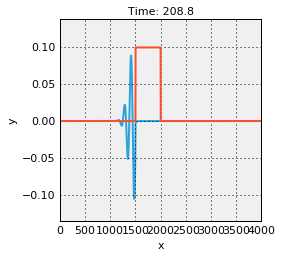
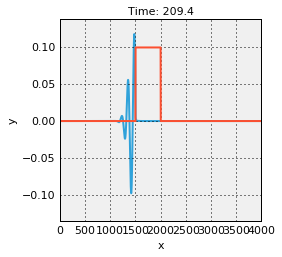
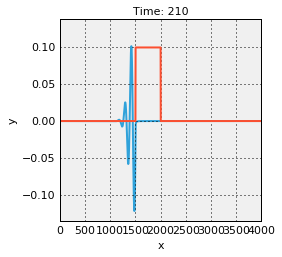
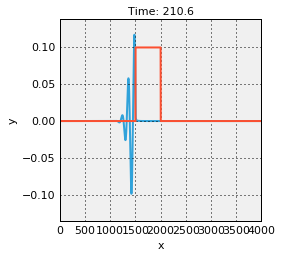
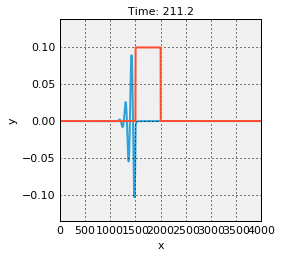
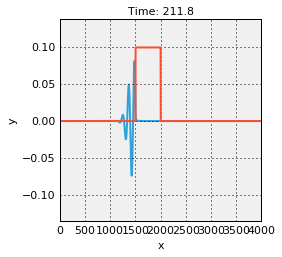
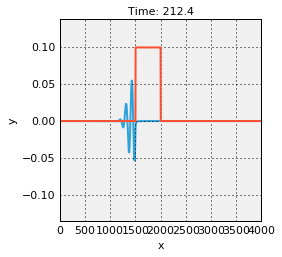
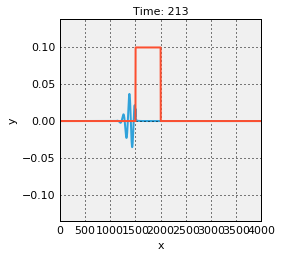
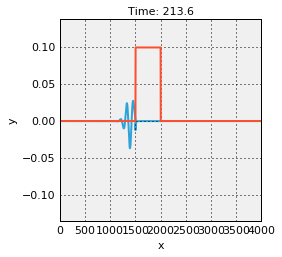
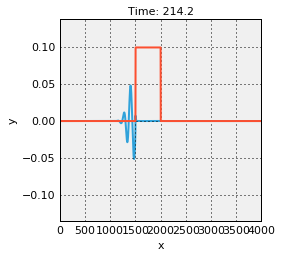
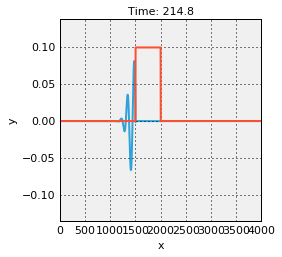
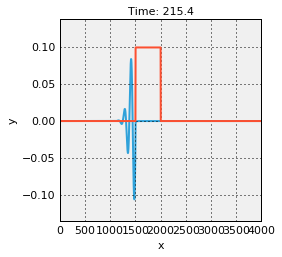
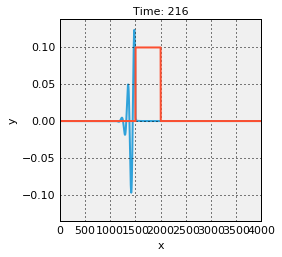
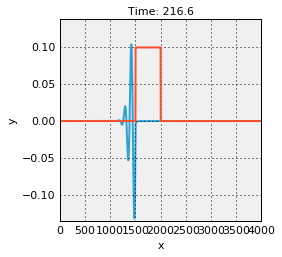
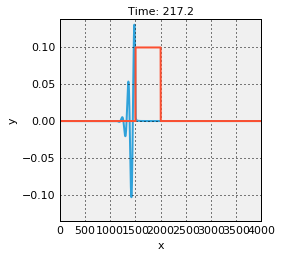
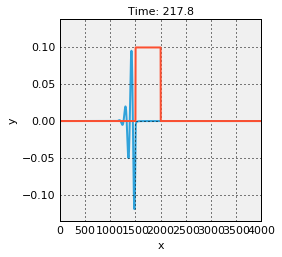
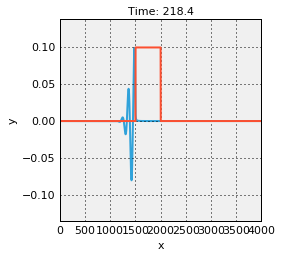
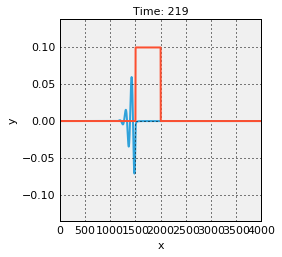
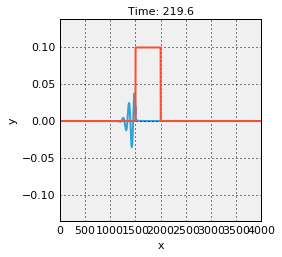
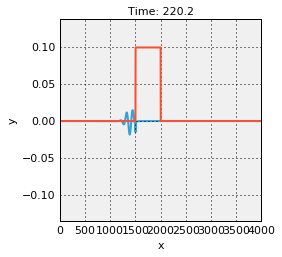
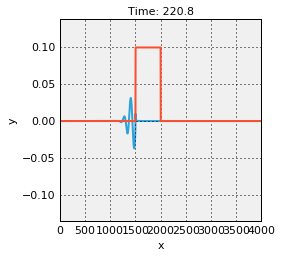
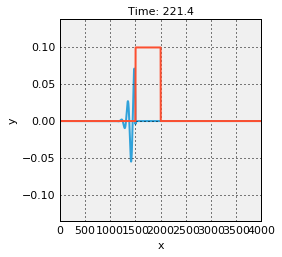
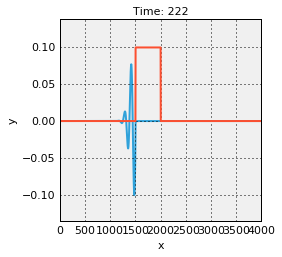
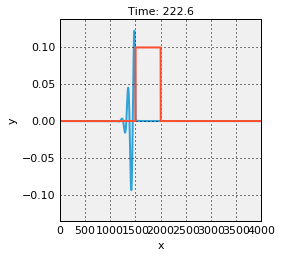
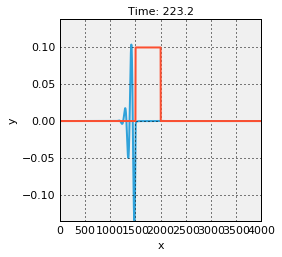
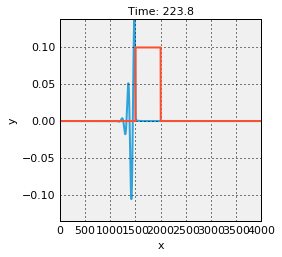
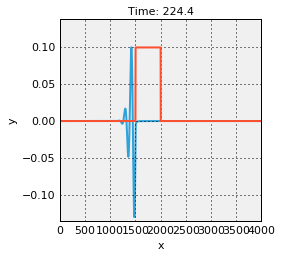
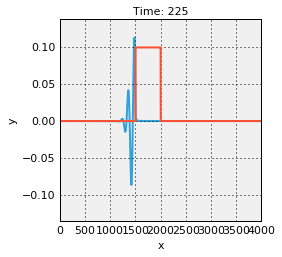
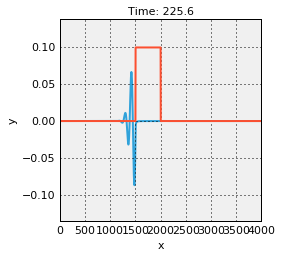
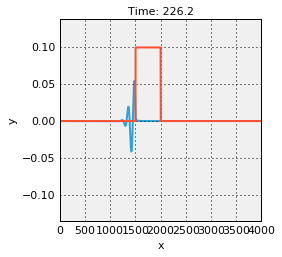
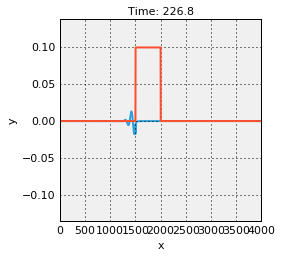
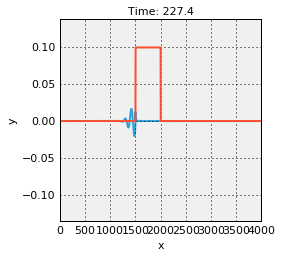
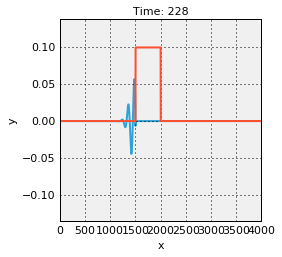
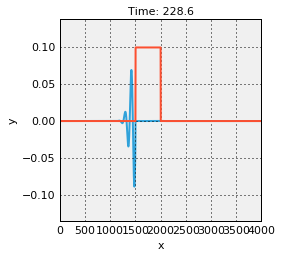
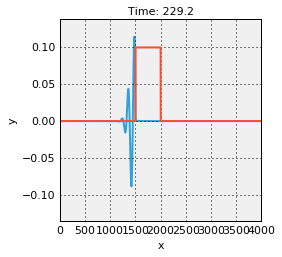
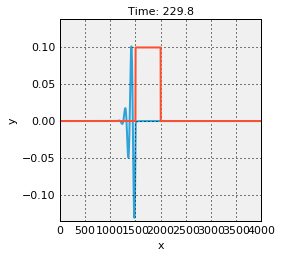
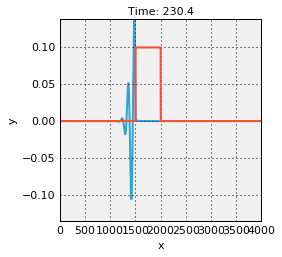
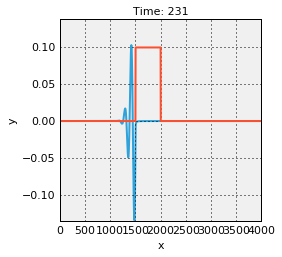
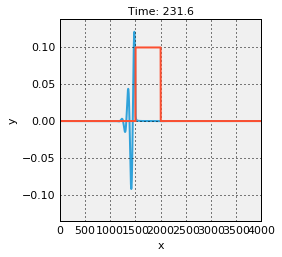
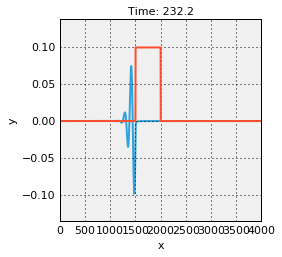
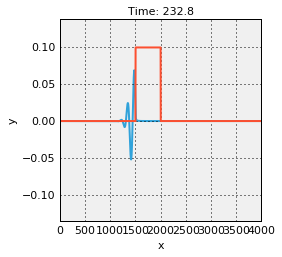
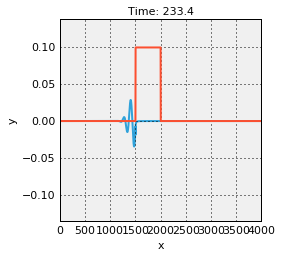
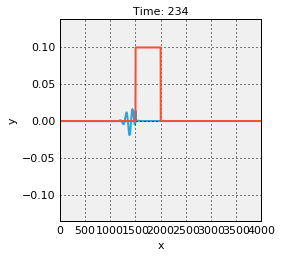
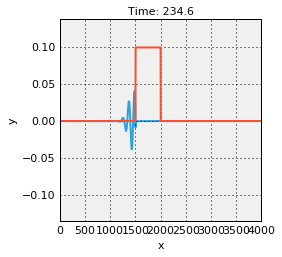
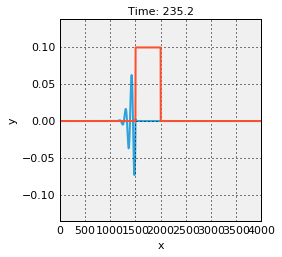
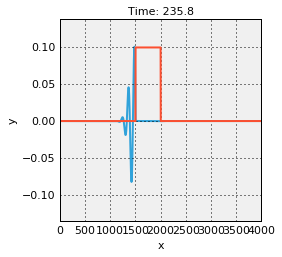
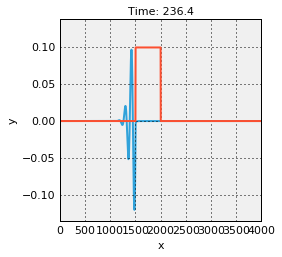
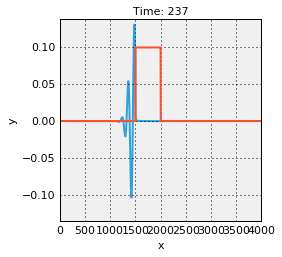
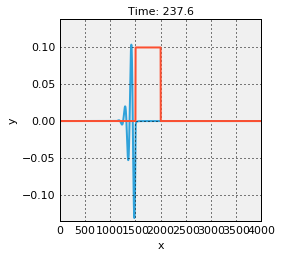
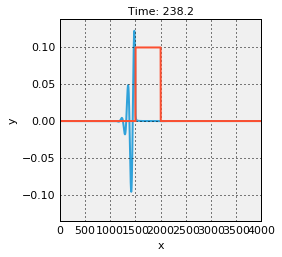
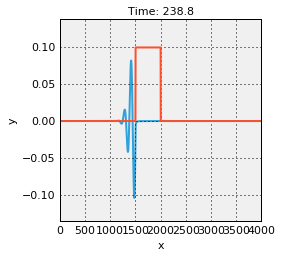
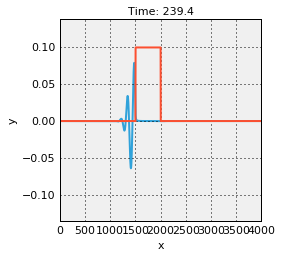
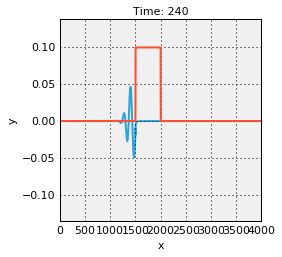
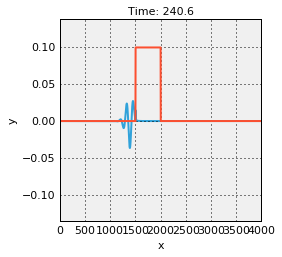
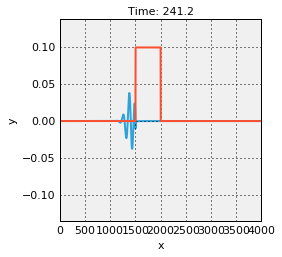
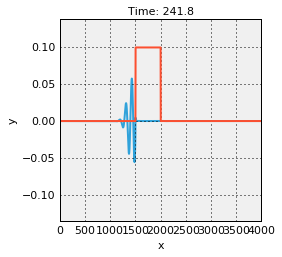
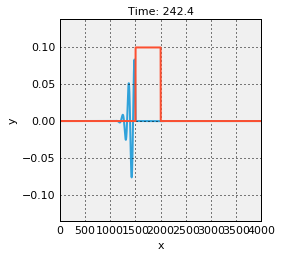
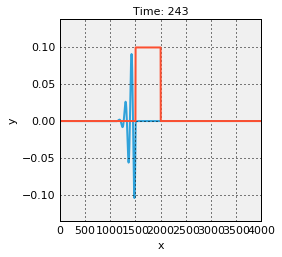
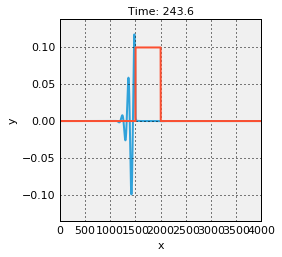
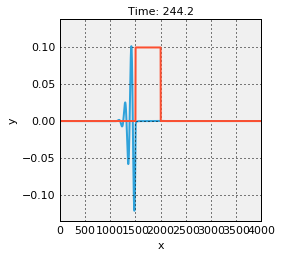
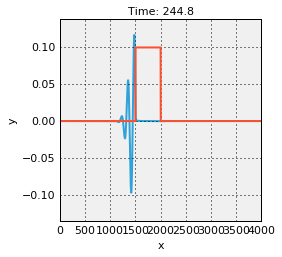
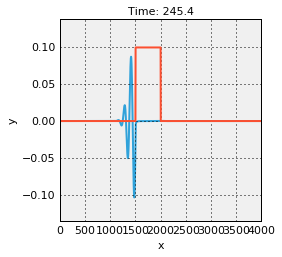
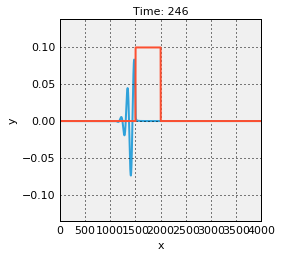
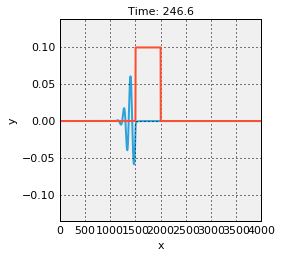
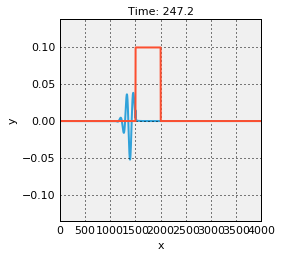
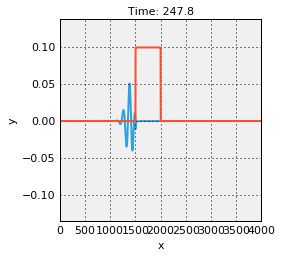
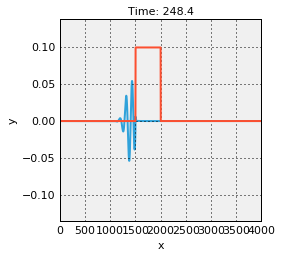
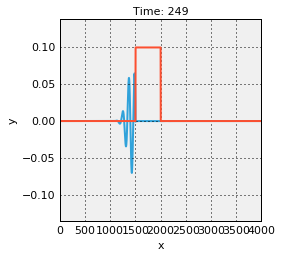
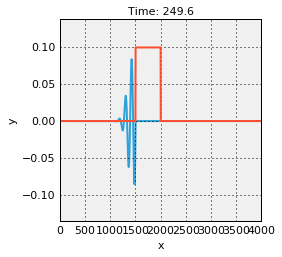
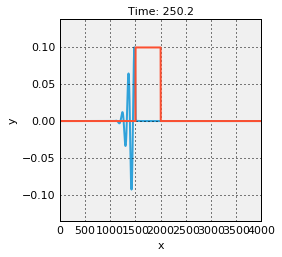
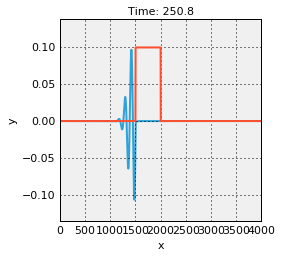
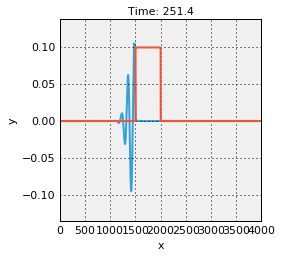
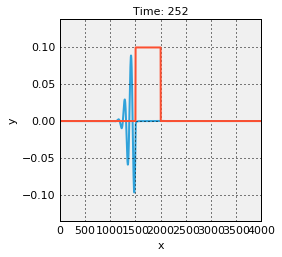
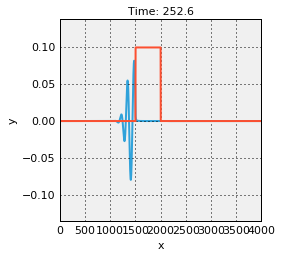
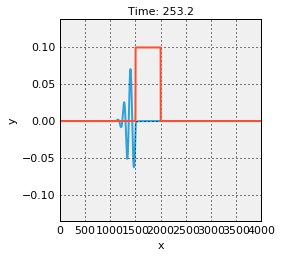
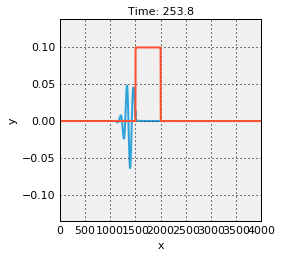
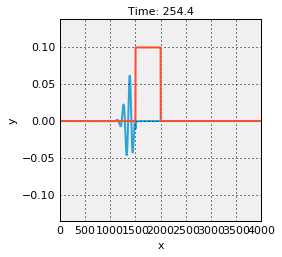
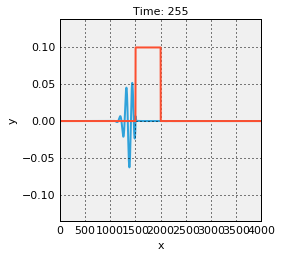
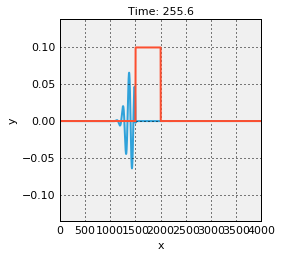
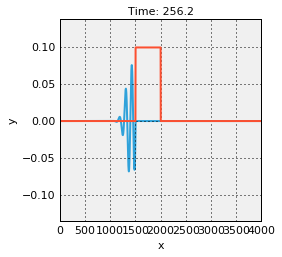
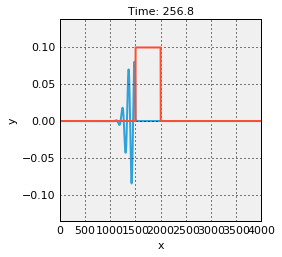
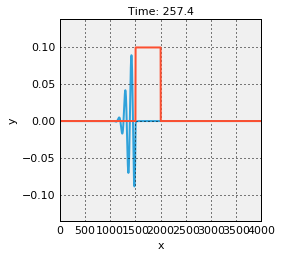
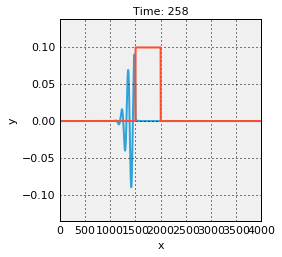
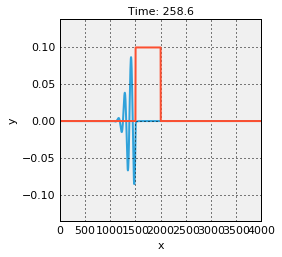
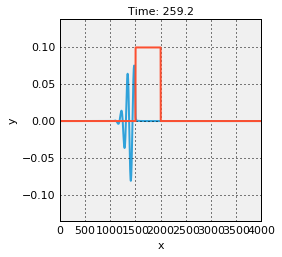
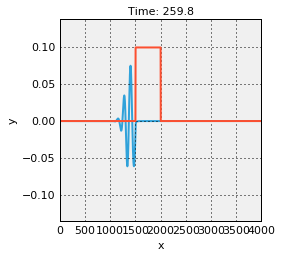
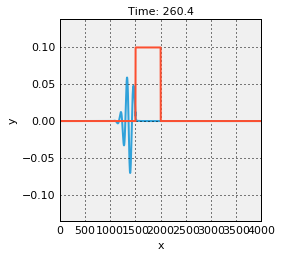
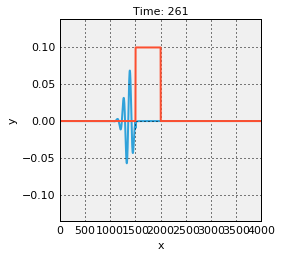
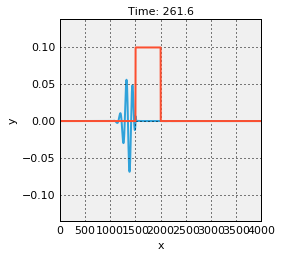
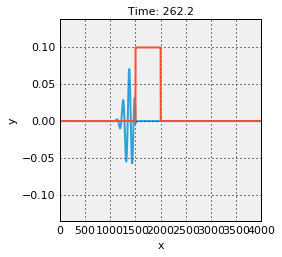
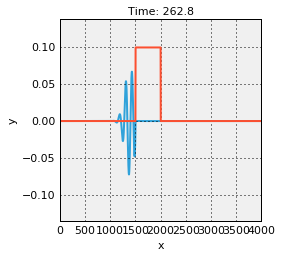
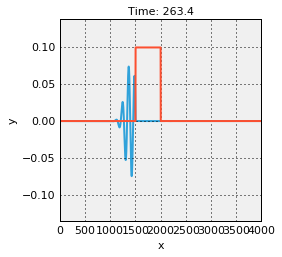
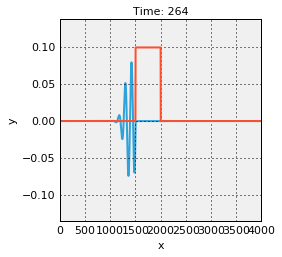
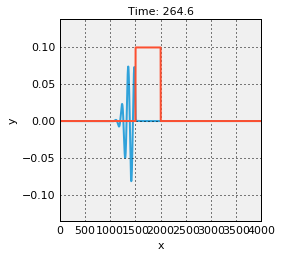
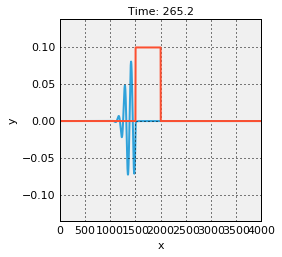
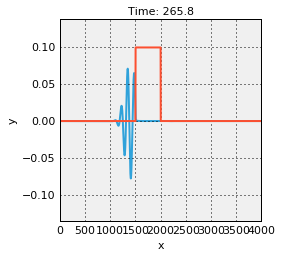
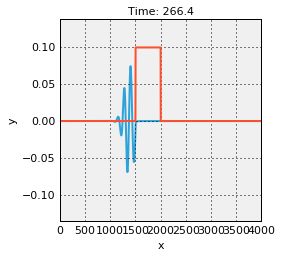
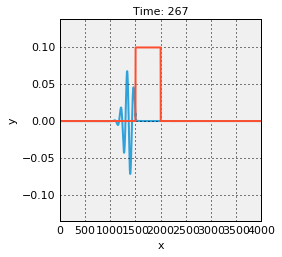
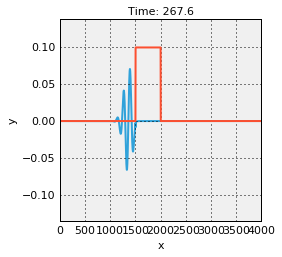
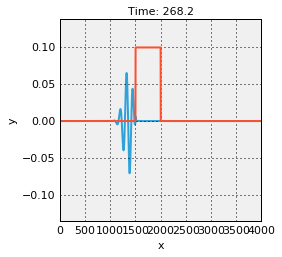
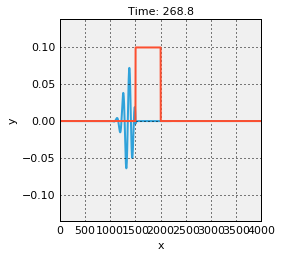
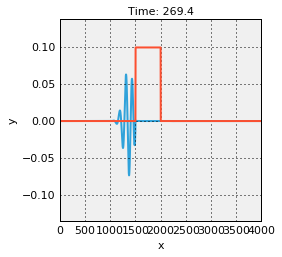
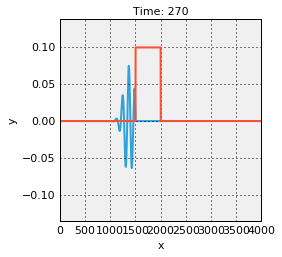
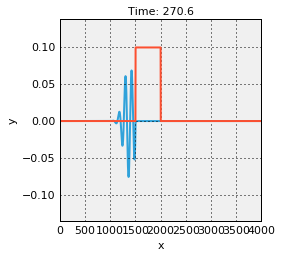
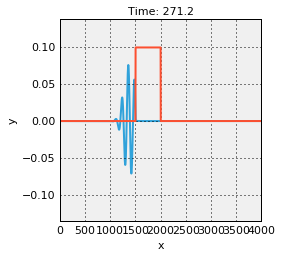
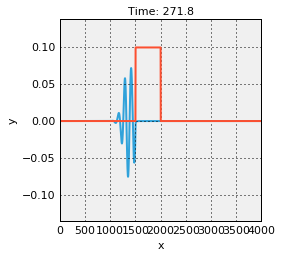
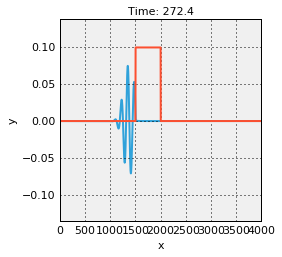
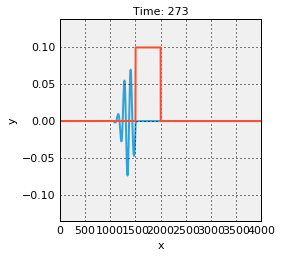
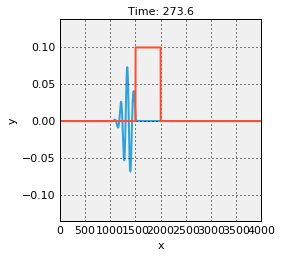
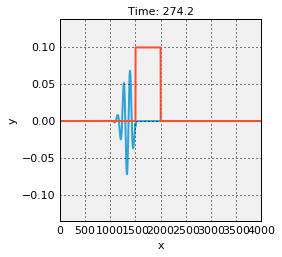
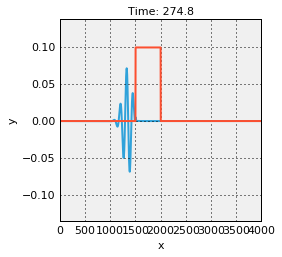
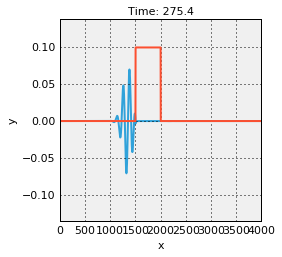
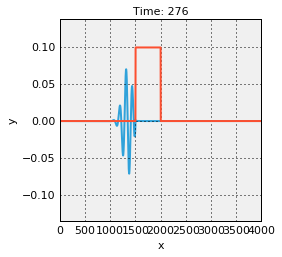
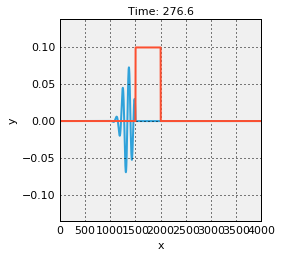
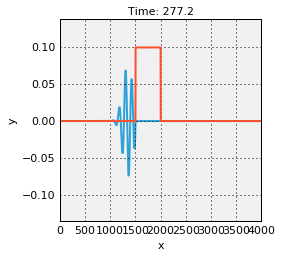
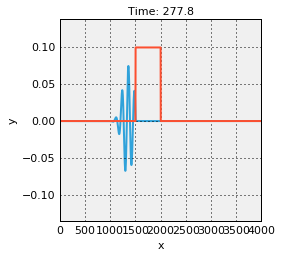
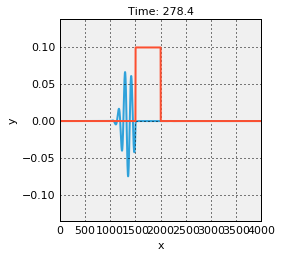
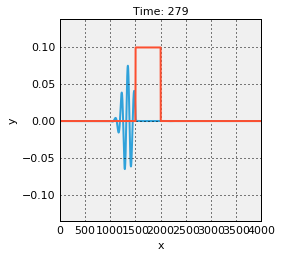
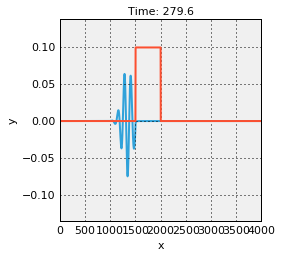
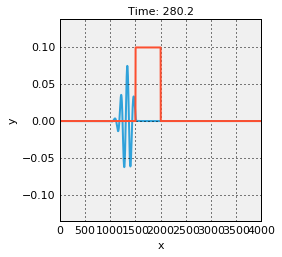
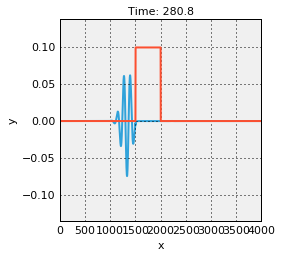
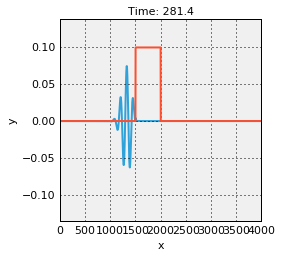
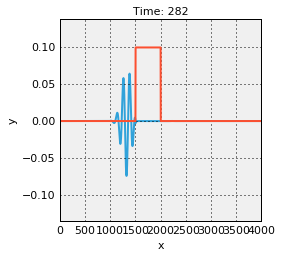
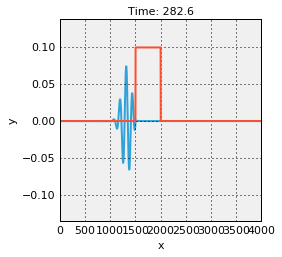
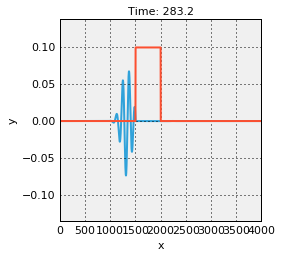
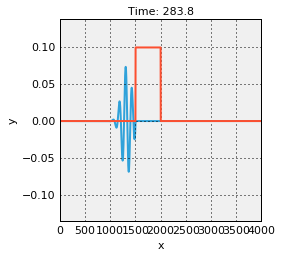
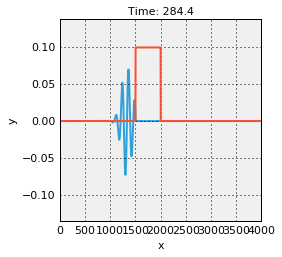
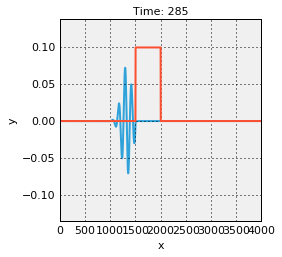
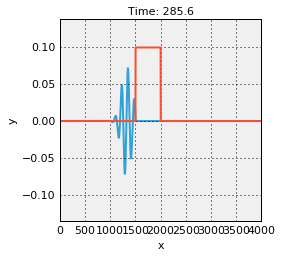
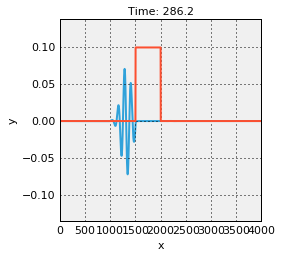
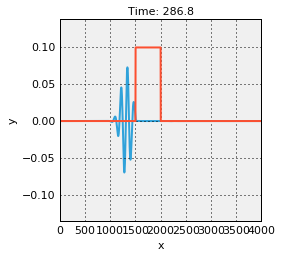
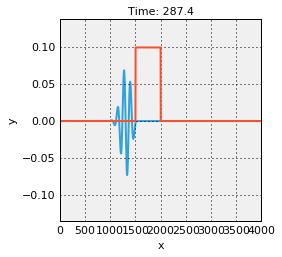
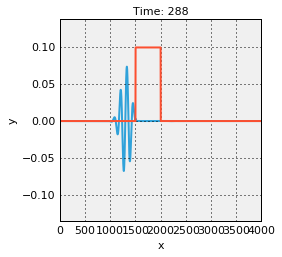
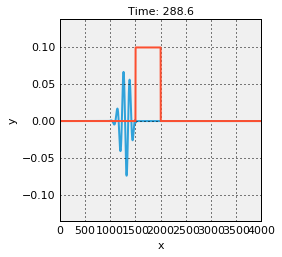
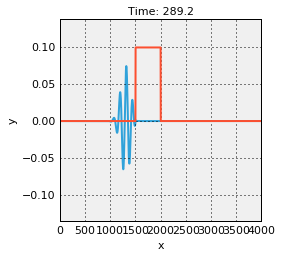
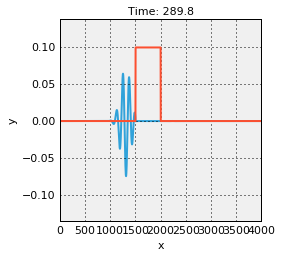
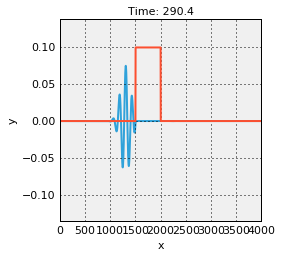
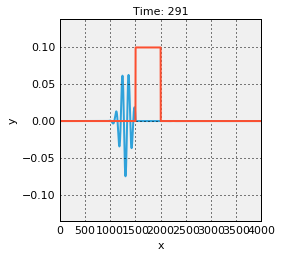
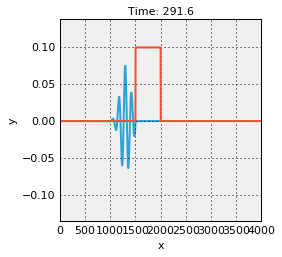
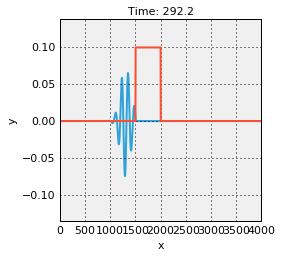
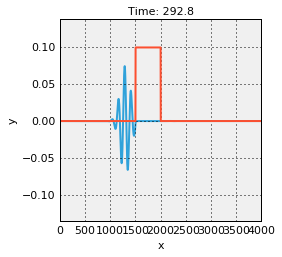
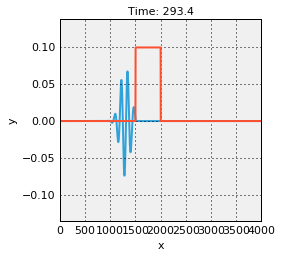
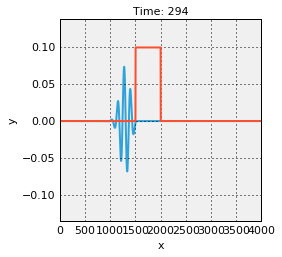
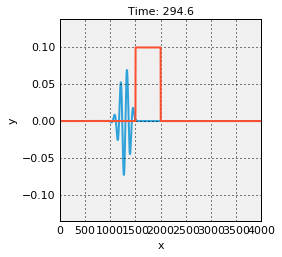
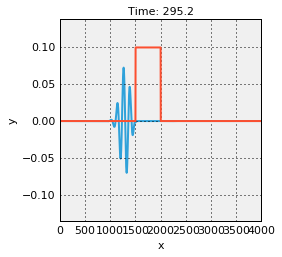
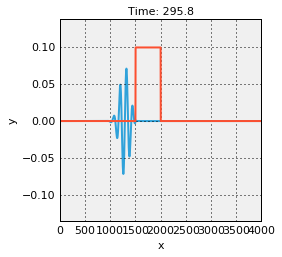
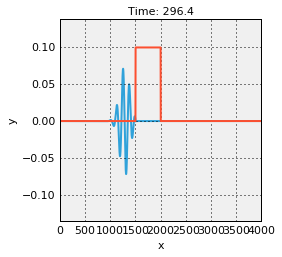
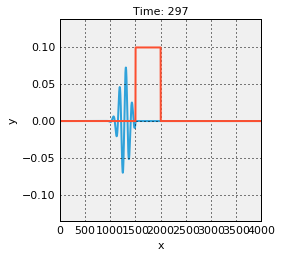
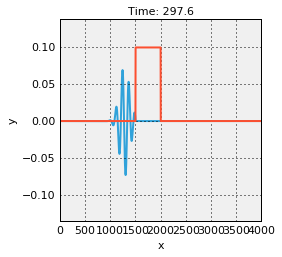
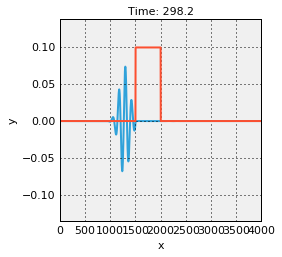
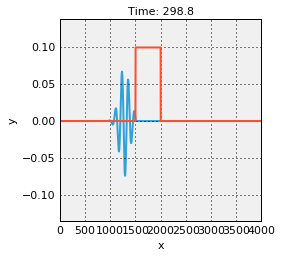

In [40]:
##Simulatior for potential barrier

V = np.vectorize(barrier)(x)
psi = split_operator(psi_init, V, x, dx, dt, L, steps)

%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Curve(np.real(psi[:, i])) * hv.Curve(V/500) )
            for i in range(0,499)], kdims = ["Time"])

In [ ]:
##Simulation for potential step

V = np.vectorize(step)(x)
psi = split_operator(psi_init, V, x, dx, dt, L, steps)

%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Curve(np.real(psi[:, i])) * hv.Curve(V/500) )
            for i in range(0,499)], kdims = ["Time"])